# Weather data and glacier mass balance for South Cascade Glacier
Note that Rasmussen has done a similar scaling in his paper, and Shad O'Neel has reported an assessment of the Benchmark glacier weather and mass balance in 2019.

written February 8-9, 2025 by RSA


In [4]:
# Import required libraries

import numpy
import pylab
import random

import matplotlib
import matplotlib.animation as manimation

print(matplotlib.__version__)

#FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='simple glacier', artist='Matplotlib',
                comment='1D simple  glacier')
#writer = FFMpegWriter(fps=15, metadata=metadata)
#writer = FFMpegWriter(fps=8, bitrate=5000, metadata=metadata)
writer = manimation.FFMpegWriter(fps=8, metadata=metadata, bitrate=5000)

import matplotlib.axes as axes
degree = u"\u00b0" # unicode symbol for degree for labeling plots nicely
      
import matplotlib as plt
import matplotlib.pyplot as plt
import matplotlib as mpl

import pandas as pd

plt.rcParams['animation.ffmpeg_path'] = 'ffmpeg'

mpl.rcParams['pdf.fonttype'] = 42 # use to make sure exported pdf's have editable text
dpi_movie = 400
mpl.rcParams['figure.dpi'] = dpi_movie

print('modules imported')

3.9.2
modules imported


In [5]:
# code tidbits from Kieran
df = pd.read_csv('Data/Input_SouthCascade_Daily_Weather.csv')
dates_list = pd.to_datetime(df.iloc[:, 0], format="%Y/%m/%d").tolist()
dates = pd.to_datetime(df.iloc[:, 0], format="%Y/%m/%d").to_numpy()

temps = df.iloc[:, 1].astype(float).to_numpy()
precip = df.iloc[:, 2].apply(lambda x: float(x) if not numpy.isnan(float(x)) else 0).to_numpy()

df1 = pd.read_csv('Data/Output_SouthCascade_Glacier_Wide_solutions_calibrated.csv', skiprows=25)
annual_mb = df1.iloc[:-1, 3].astype(float).tolist()
summer_mb = df1.iloc[:-1, 2].astype(float).tolist()
winter_mb = df1.iloc[:-1, 1].astype(float).tolist()

# see bottom of the file for conversion of dates to fractional years in a numpy array, for future use.

In [6]:
# parameters

pdd_snow = 0.0028 # m water equivalent per pdd
pdd_ice = 0.006

#### Figure 4b from Rasmussen on South Cascade mass balance suggests lapse rate varies over an annual cycle

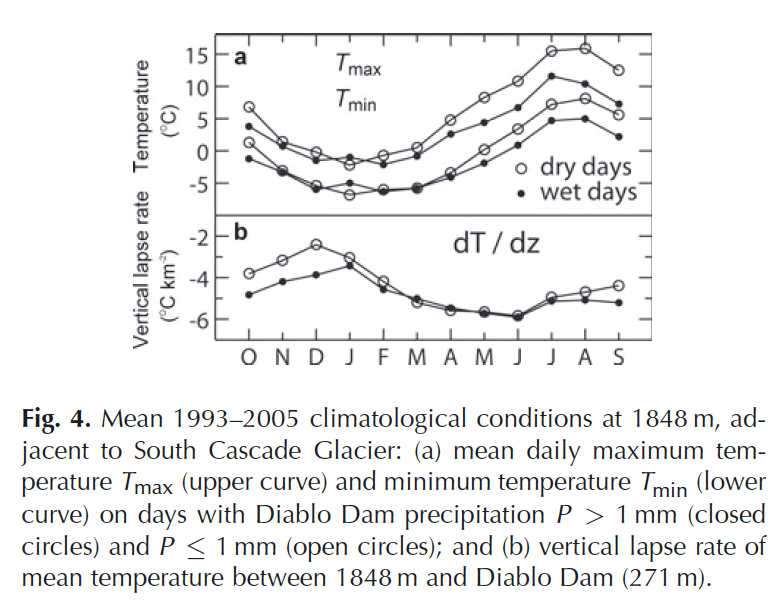


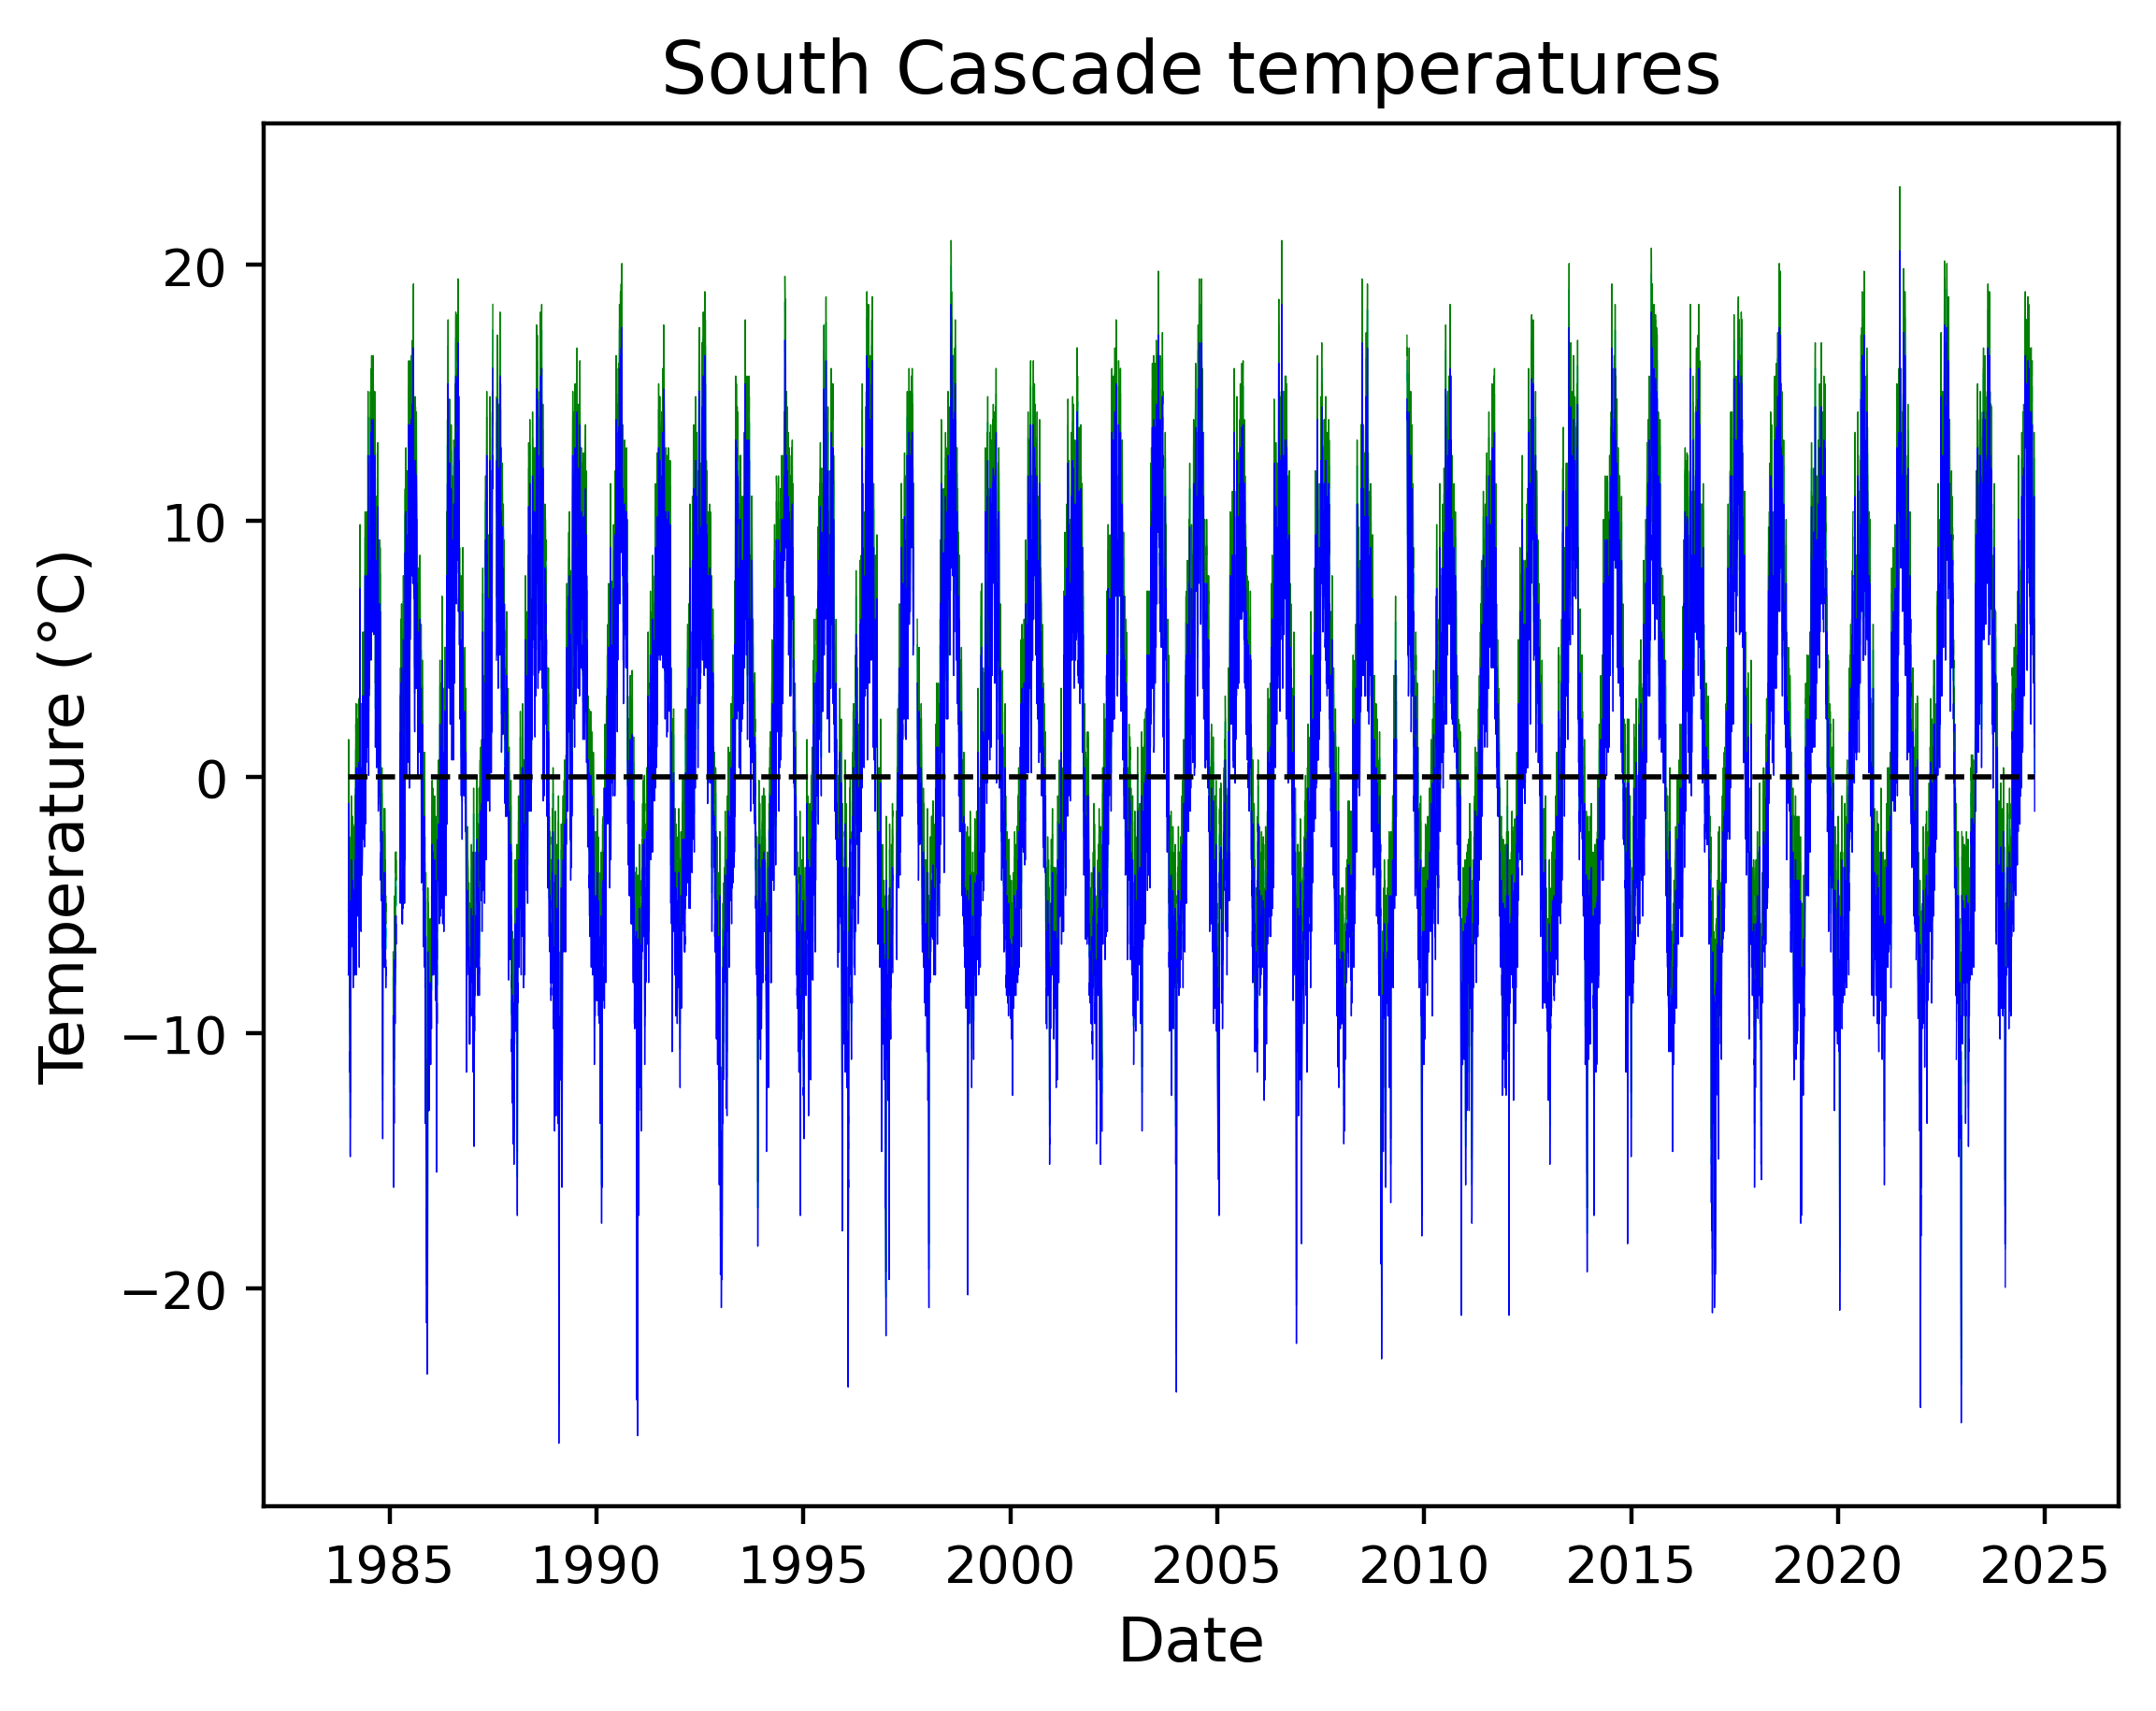

(nan, nan, nan)

In [7]:
# South Cascade glacier exists from 1700 to 2200 m, so 500 m elevation span
#lapse_rate = 6.5/1000 # in degrees C per m
lapse_rate = 5/1000 # in degrees C per m Rasmussen claims the lapse rate varies annually 4-6 °C/km 
# (see graph above)])


# elevation of met station is 272m
zmet = 272 # met station at Diablo Dam 40 km away

temps_lapse1900 = temps - lapse_rate*(1900-zmet)
temps_lapse1700 = temps - lapse_rate*(1700-zmet)
temps_lapse2200 = temps - lapse_rate*(2200-zmet)

#pylab.plot(dates,temps,'r',linewidth=0.5)
pylab.plot(dates,temps_lapse1900,'c',linewidth=0.25)
pylab.plot(dates,temps_lapse1700,'g',linewidth=0.25)
pylab.plot(dates,temps_lapse2200,'b',linewidth=0.25)

pylab.plot(dates,numpy.zeros(len(temps)),'k--',linewidth=1)


pylab.xlabel('Date',fontsize=12)
pylab.ylabel('Temperature (°C)',fontsize=12)
pylab.title("South Cascade temperatures",fontsize = 14)
pylab.show()

Tmean1700=numpy.mean(temps_lapse1700)
Tmean1900=numpy.mean(temps_lapse1900)
Tmean2200=numpy.mean(temps_lapse2200)

Tmean1700,Tmean1900,Tmean2200

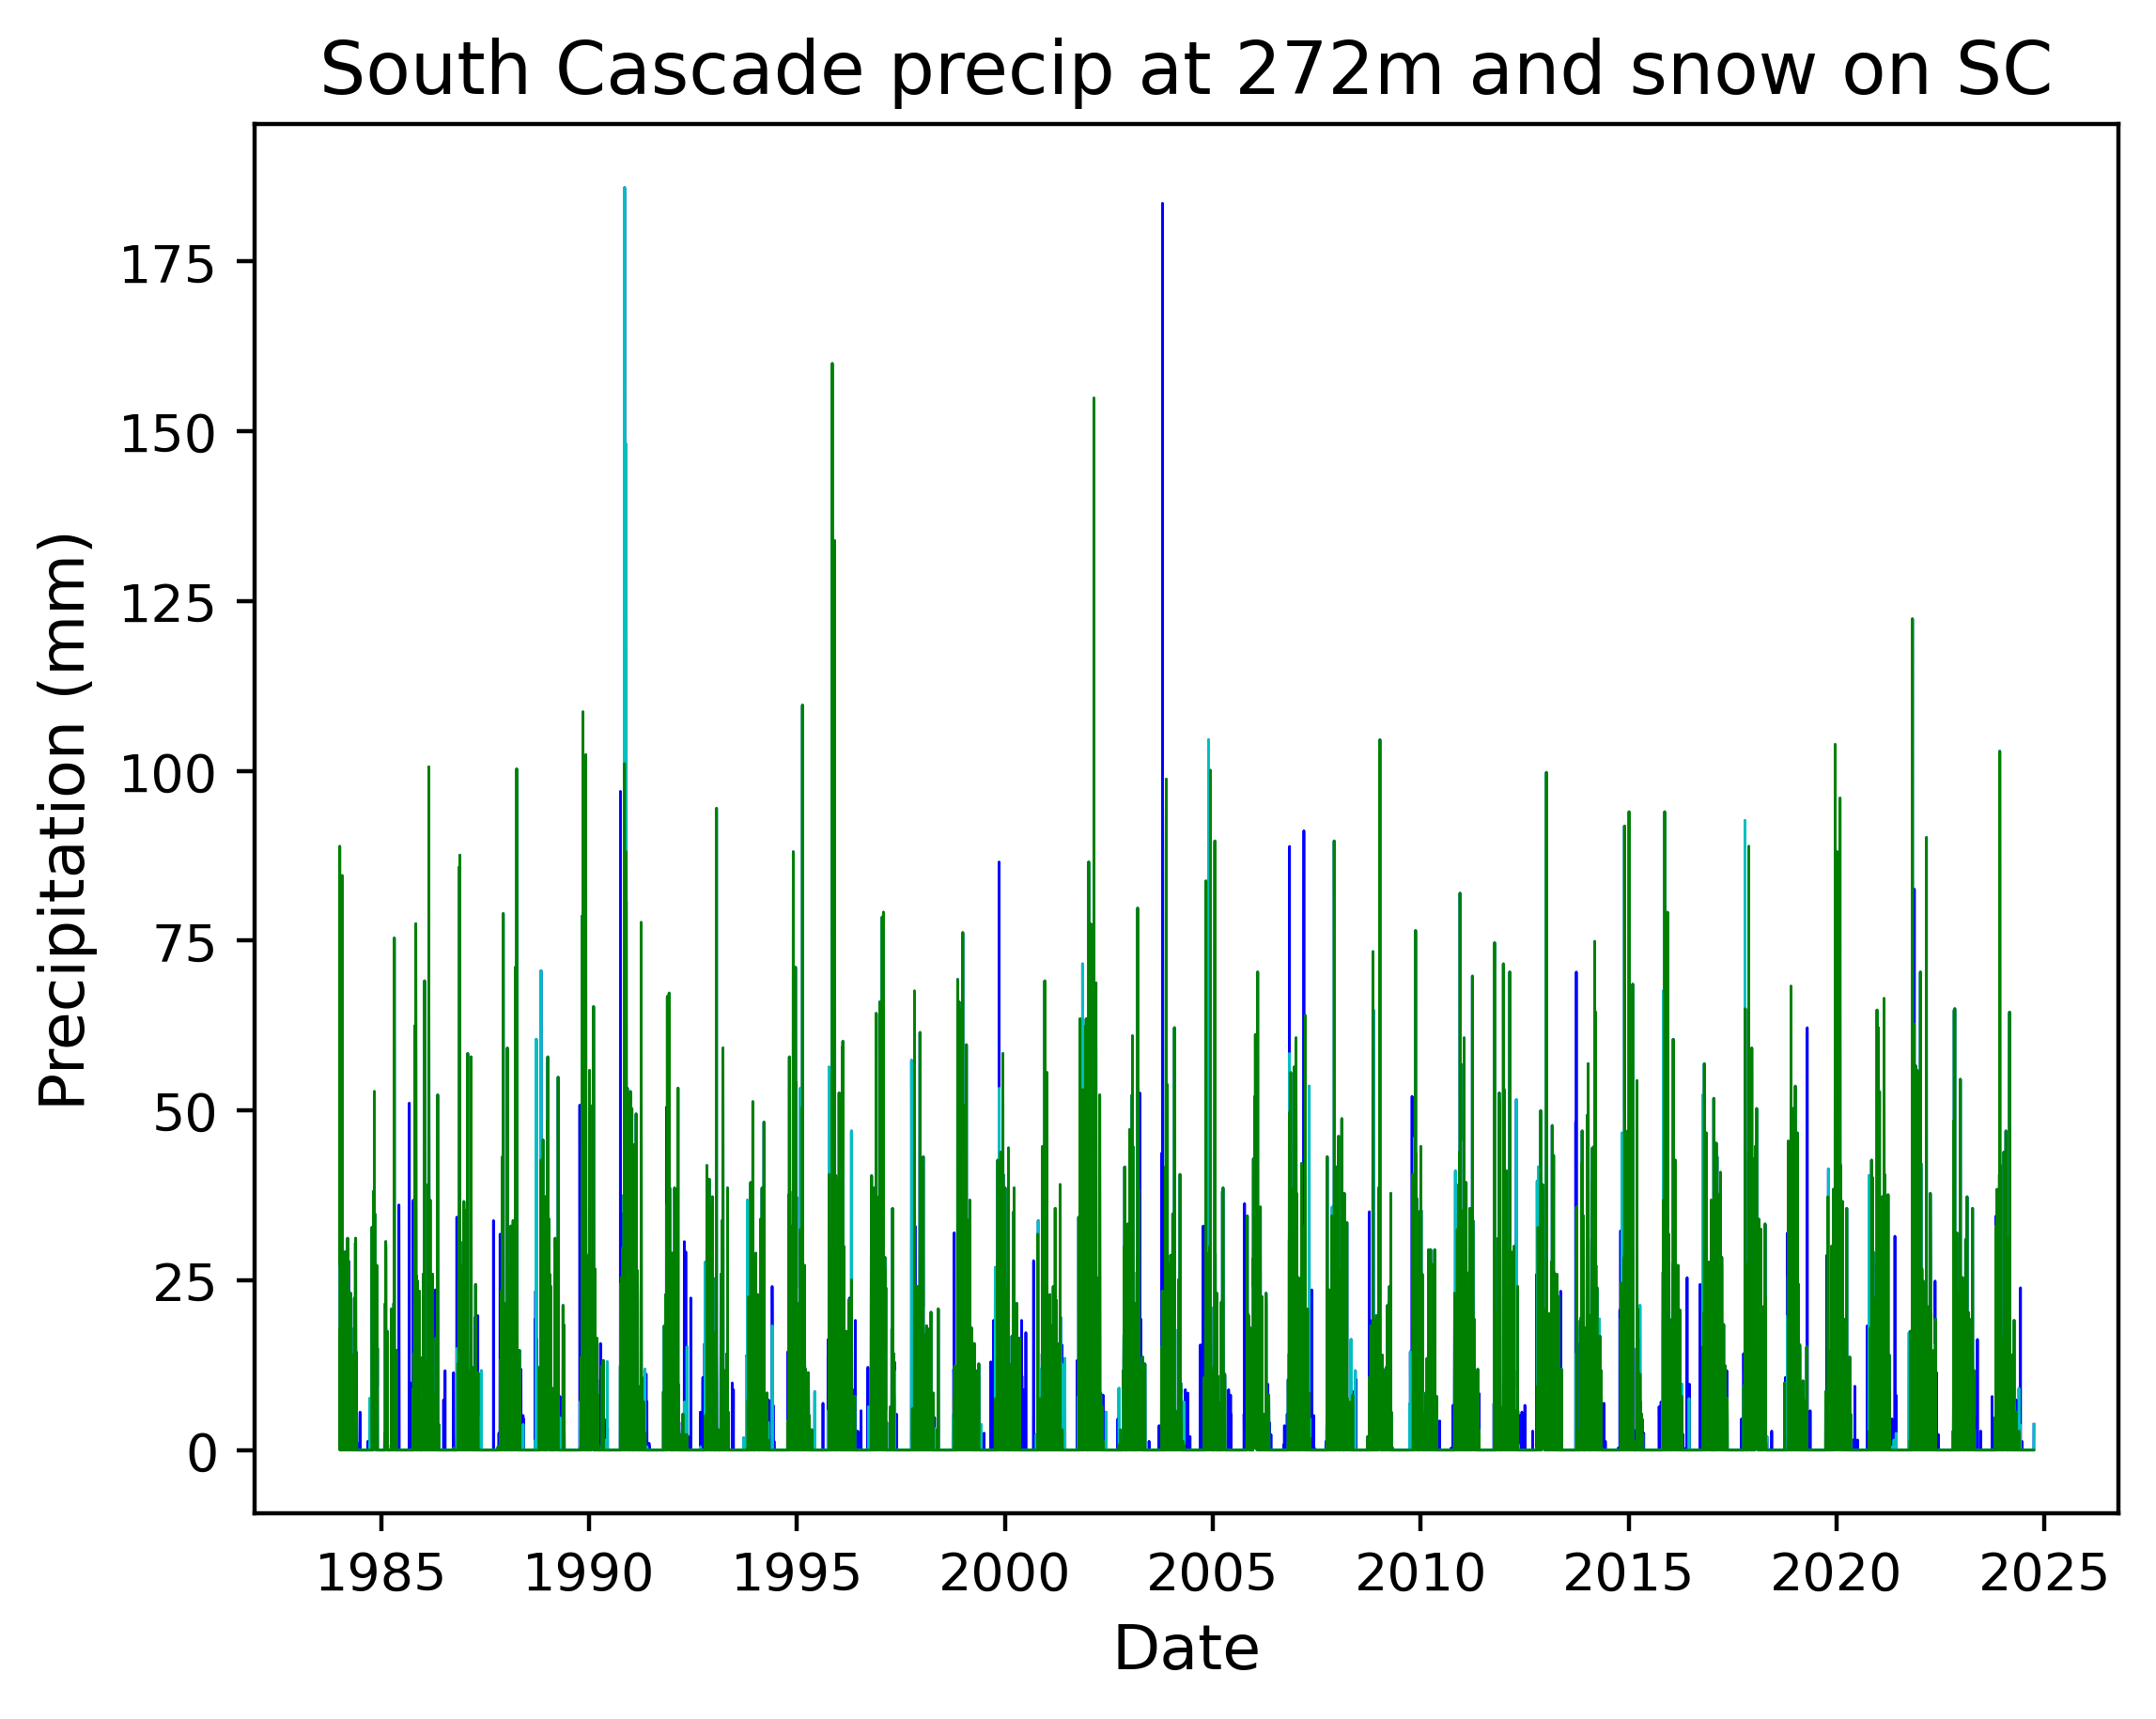

In [8]:
# OK now we do precipitation
# first wew adjust the precipitation by allowing it to snow only when the temperature ON THE GLACIER <0

Tsnow = 1
#precip = df.iloc[:, 2].apply(lambda x: float(x) if not numpy.isnan(float(x)) else 0).to_numpy()
snow1900 = numpy.zeros(len(temps))
snow1900[temps_lapse1900<Tsnow] = precip[temps_lapse1900<Tsnow]

snow1700 = numpy.zeros(len(temps))
snow1700[temps_lapse1700<Tsnow] = precip[temps_lapse1700<Tsnow]

snow2200 = numpy.zeros(len(temps))
snow2200[temps_lapse2200<Tsnow] = precip[temps_lapse2200<Tsnow]

#pylab.plot(dates,precip,'r',linewidth=0.5)
pylab.plot(dates,snow2200,'b',linewidth=0.5)
pylab.plot(dates,snow1900,'c',linewidth=0.5)
pylab.plot(dates,snow1700,'g',linewidth=0.5)

#pylab.plot(dates,temps_lapse,'c',linewidth=0.5)

#pylab.plot(x,zb0,'r',linewidth=0.5)
#pylab.plot(xmid/1000,zbmid,'g',linewidth=0.5)

#pylab.xlim(0,xmax/1000)
#pylab.ylim(numpy.min(zb0)-10,numpy.max(z0)+20)

pylab.xlabel('Date',fontsize=12)
pylab.ylabel('Precipitation (mm)',fontsize=12)
pylab.title("South Cascade precip at 272m and snow on SC",fontsize = 14)
pylab.show()

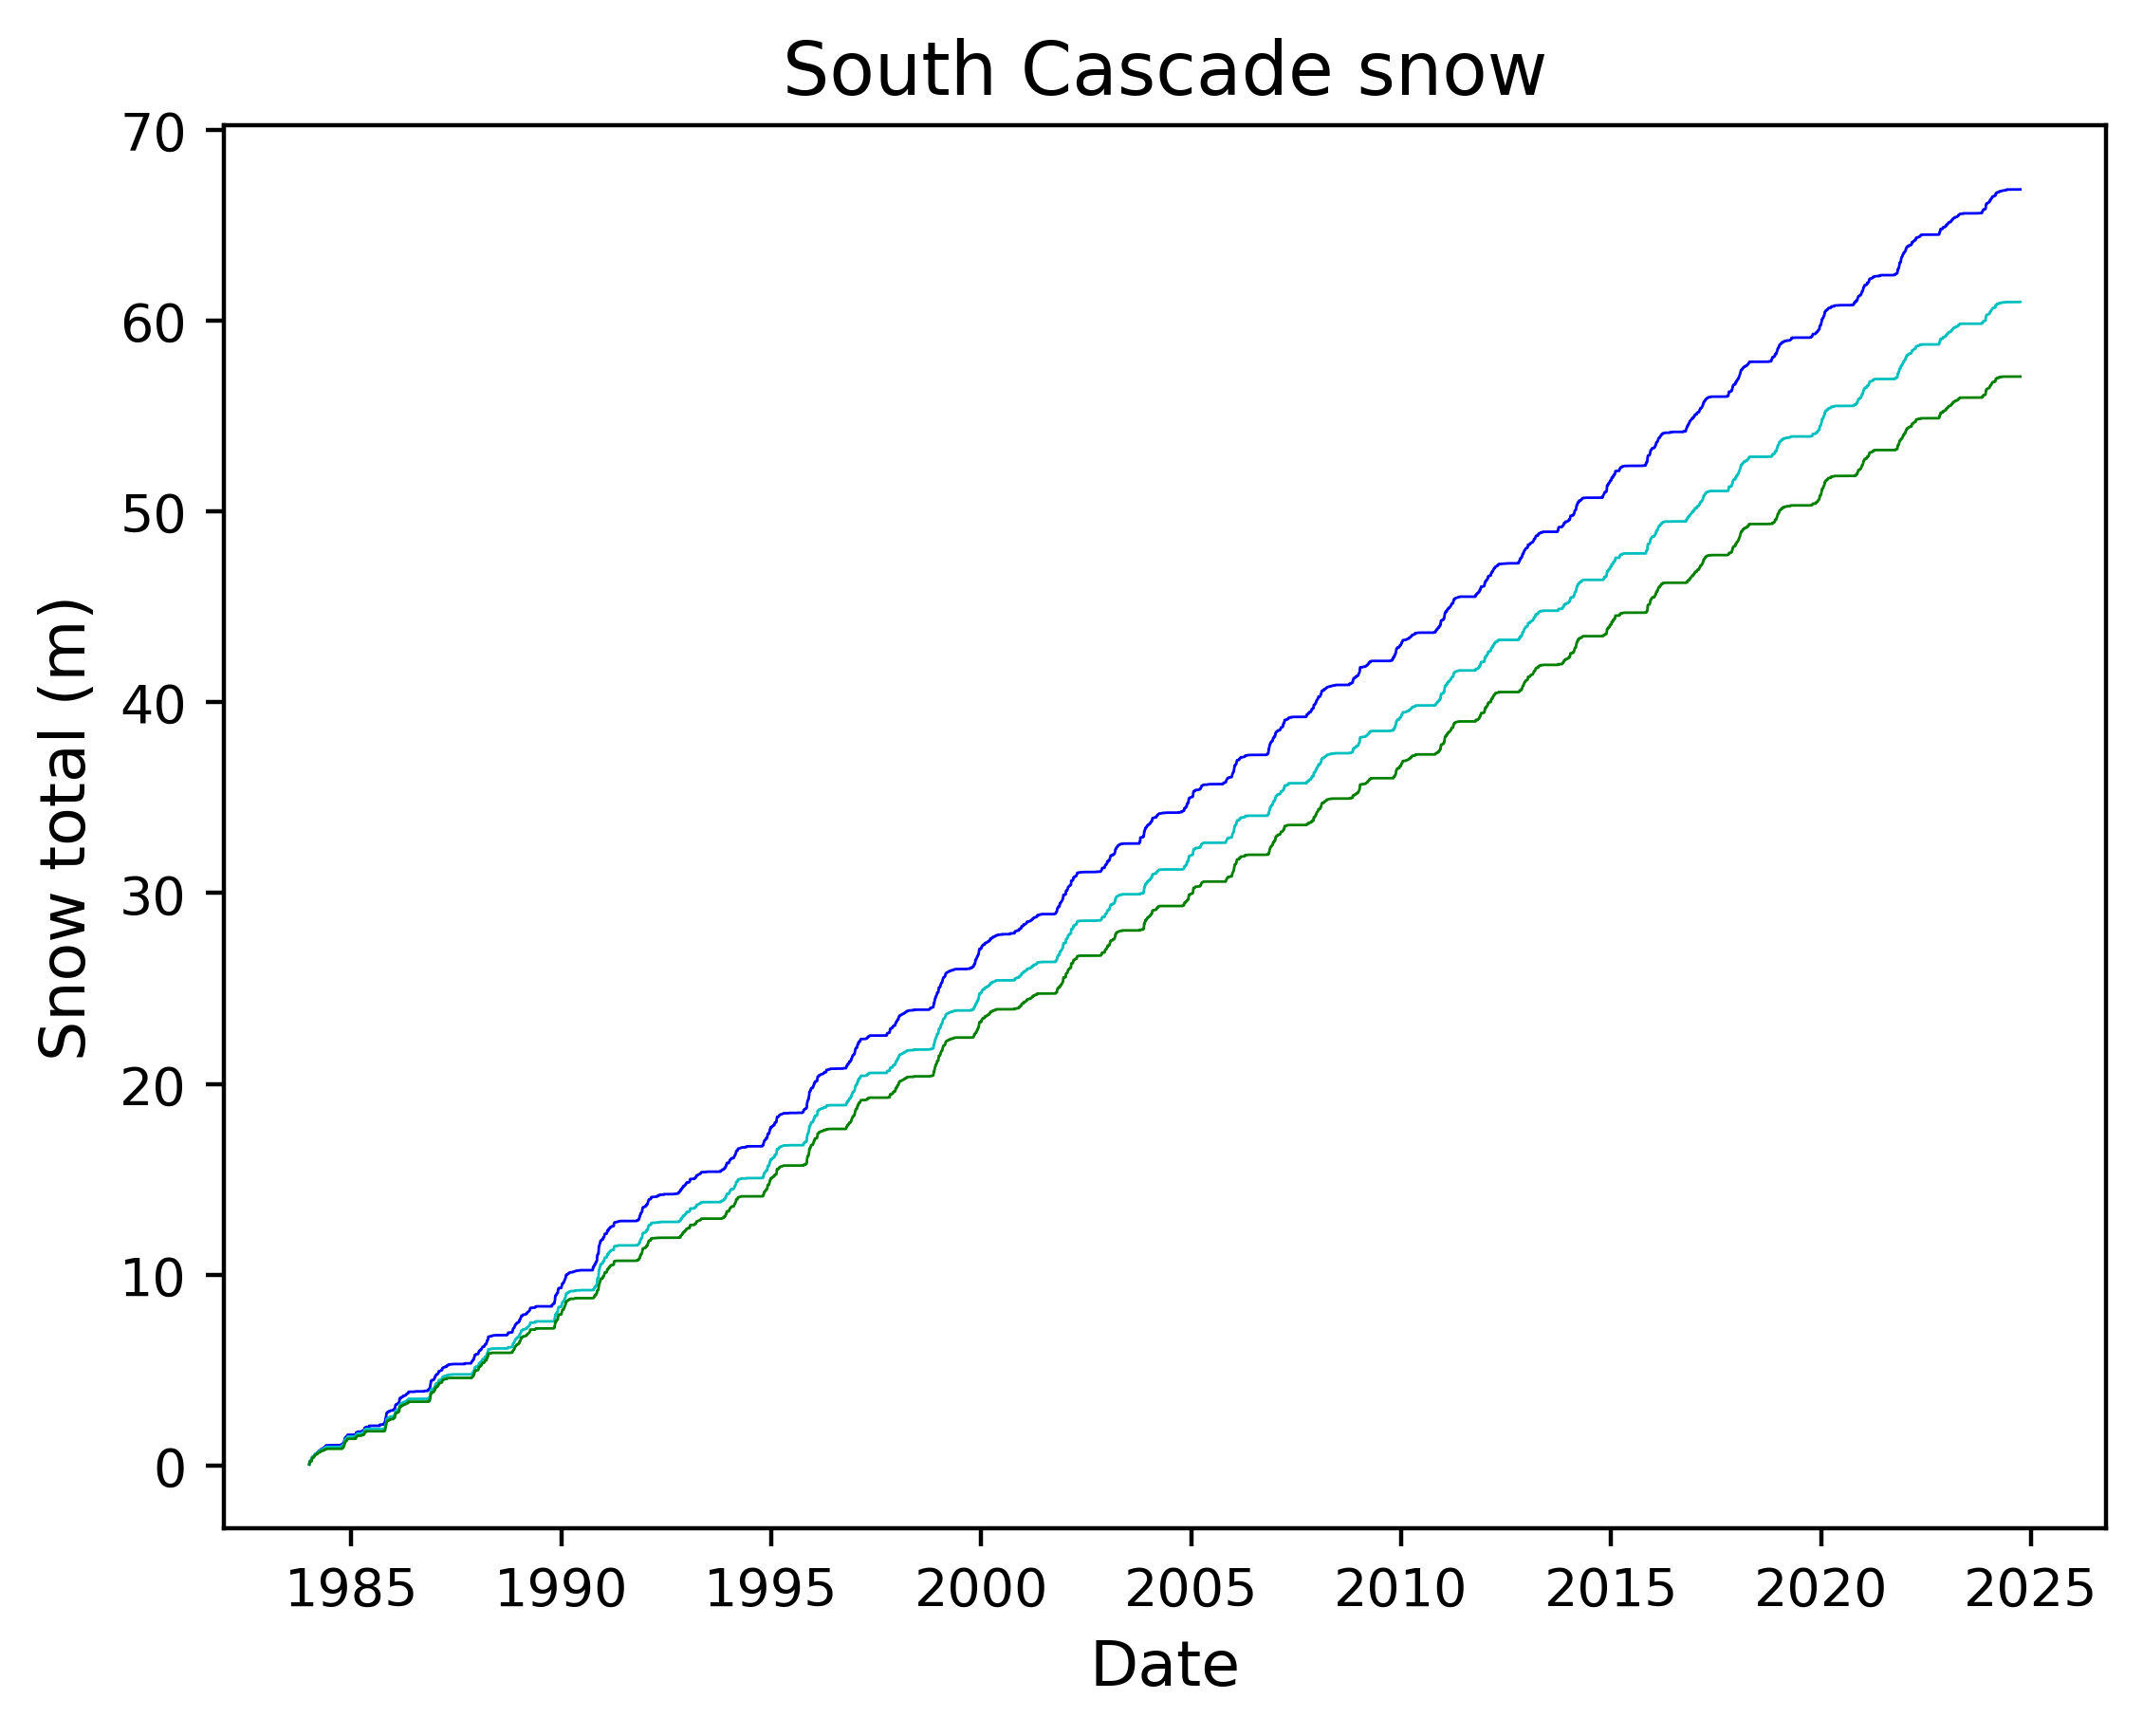

In [9]:
snow_total_1900 = numpy.cumsum(snow1900)/1000.0
snow_total_1700 = numpy.cumsum(snow1700)/1000.0
snow_total_2200 = numpy.cumsum(snow2200)/1000.0

pylab.plot(dates,snow_total_2200,'b',linewidth=0.5)
pylab.plot(dates,snow_total_1900,'c',linewidth=0.5)
pylab.plot(dates,snow_total_1700,'g',linewidth=0.5)


pylab.xlabel('Date',fontsize=12)
pylab.ylabel('Snow total (m)',fontsize=12)
pylab.title("South Cascade snow",fontsize = 14)
pylab.show()

snow_ave_annual = snow_total_1900[-1]/40

In [10]:
dates_num = df1.iloc[:, 0]
#dates_num = df[:, 0]

#temps = df.iloc[:, 1].astype(float).to_numpy()


In [11]:
dates_num

0     1984
1     1985
2     1986
3     1987
4     1988
5     1989
6     1990
7     1991
8     1992
9     1993
10    1994
11    1995
12    1996
13    1997
14    1998
15    1999
16    2000
17    2001
18    2002
19    2003
20    2004
21    2005
22    2006
23    2007
24    2008
25    2009
26    2010
27    2011
28    2012
29    2013
30    2014
31    2015
32    2016
33    2017
34    2018
35    2019
36    2020
37    2021
38    2022
39    2023
40    2024
Name: 1983, dtype: int64

In [12]:
df.shape

(14883, 4)

In [13]:
yr0 = 1980
imax = len(dates_num)

snow_total_1900_yr = numpy.zeros(imax)
snow_total_1700_yr = numpy.zeros(imax)
snow_total_2200_yr = numpy.zeros(imax)

snow_total_1900_yr[0] = 0.
snow_total_1700_yr[0] = 0.
snow_total_2200_yr[0] = 0.

wyr_start = 240

snow_total_1900_yr[0] = snow_total_1900[wyr_start]
snow_total_1700_yr[0] = snow_total_1700[wyr_start]
snow_total_2200_yr[0] = snow_total_2200[wyr_start]

#snow_total_1900[wyr_start+(365*i)]
    
for i in range(1,imax):
    
    snow_total_1900_yr[i] = snow_total_1900[wyr_start+(365*i)]
    snow_total_1700_yr[i] = snow_total_1700[wyr_start+(365*i)]
    snow_total_2200_yr[i] = snow_total_2200[wyr_start+(365*i)]
    


In [14]:
snow_total_1900_yr

array([ 0.9632,  1.9082,  3.4853,  4.7655,  6.1246,  7.5453,  9.182 ,
       11.5286, 12.7609, 13.7965, 15.0554, 16.7824, 18.8803, 20.573 ,
       21.7933, 23.8479, 25.425 , 26.3913, 28.5527, 29.9397, 31.2397,
       32.6377, 34.0558, 35.7606, 37.3335, 38.5   , 39.8395, 41.6747,
       43.2759, 44.8059, 46.4235, 47.8095, 49.4883, 51.0819, 52.8773,
       53.9421, 55.5452, 56.9561, 58.7664, 59.8535, 60.9902])

In [15]:
snow_1900=numpy.diff(snow_total_1900_yr)
snow_1700=numpy.diff(snow_total_1700_yr)
snow_2200=numpy.diff(snow_total_2200_yr)


In [16]:
len(snow_1900)

40

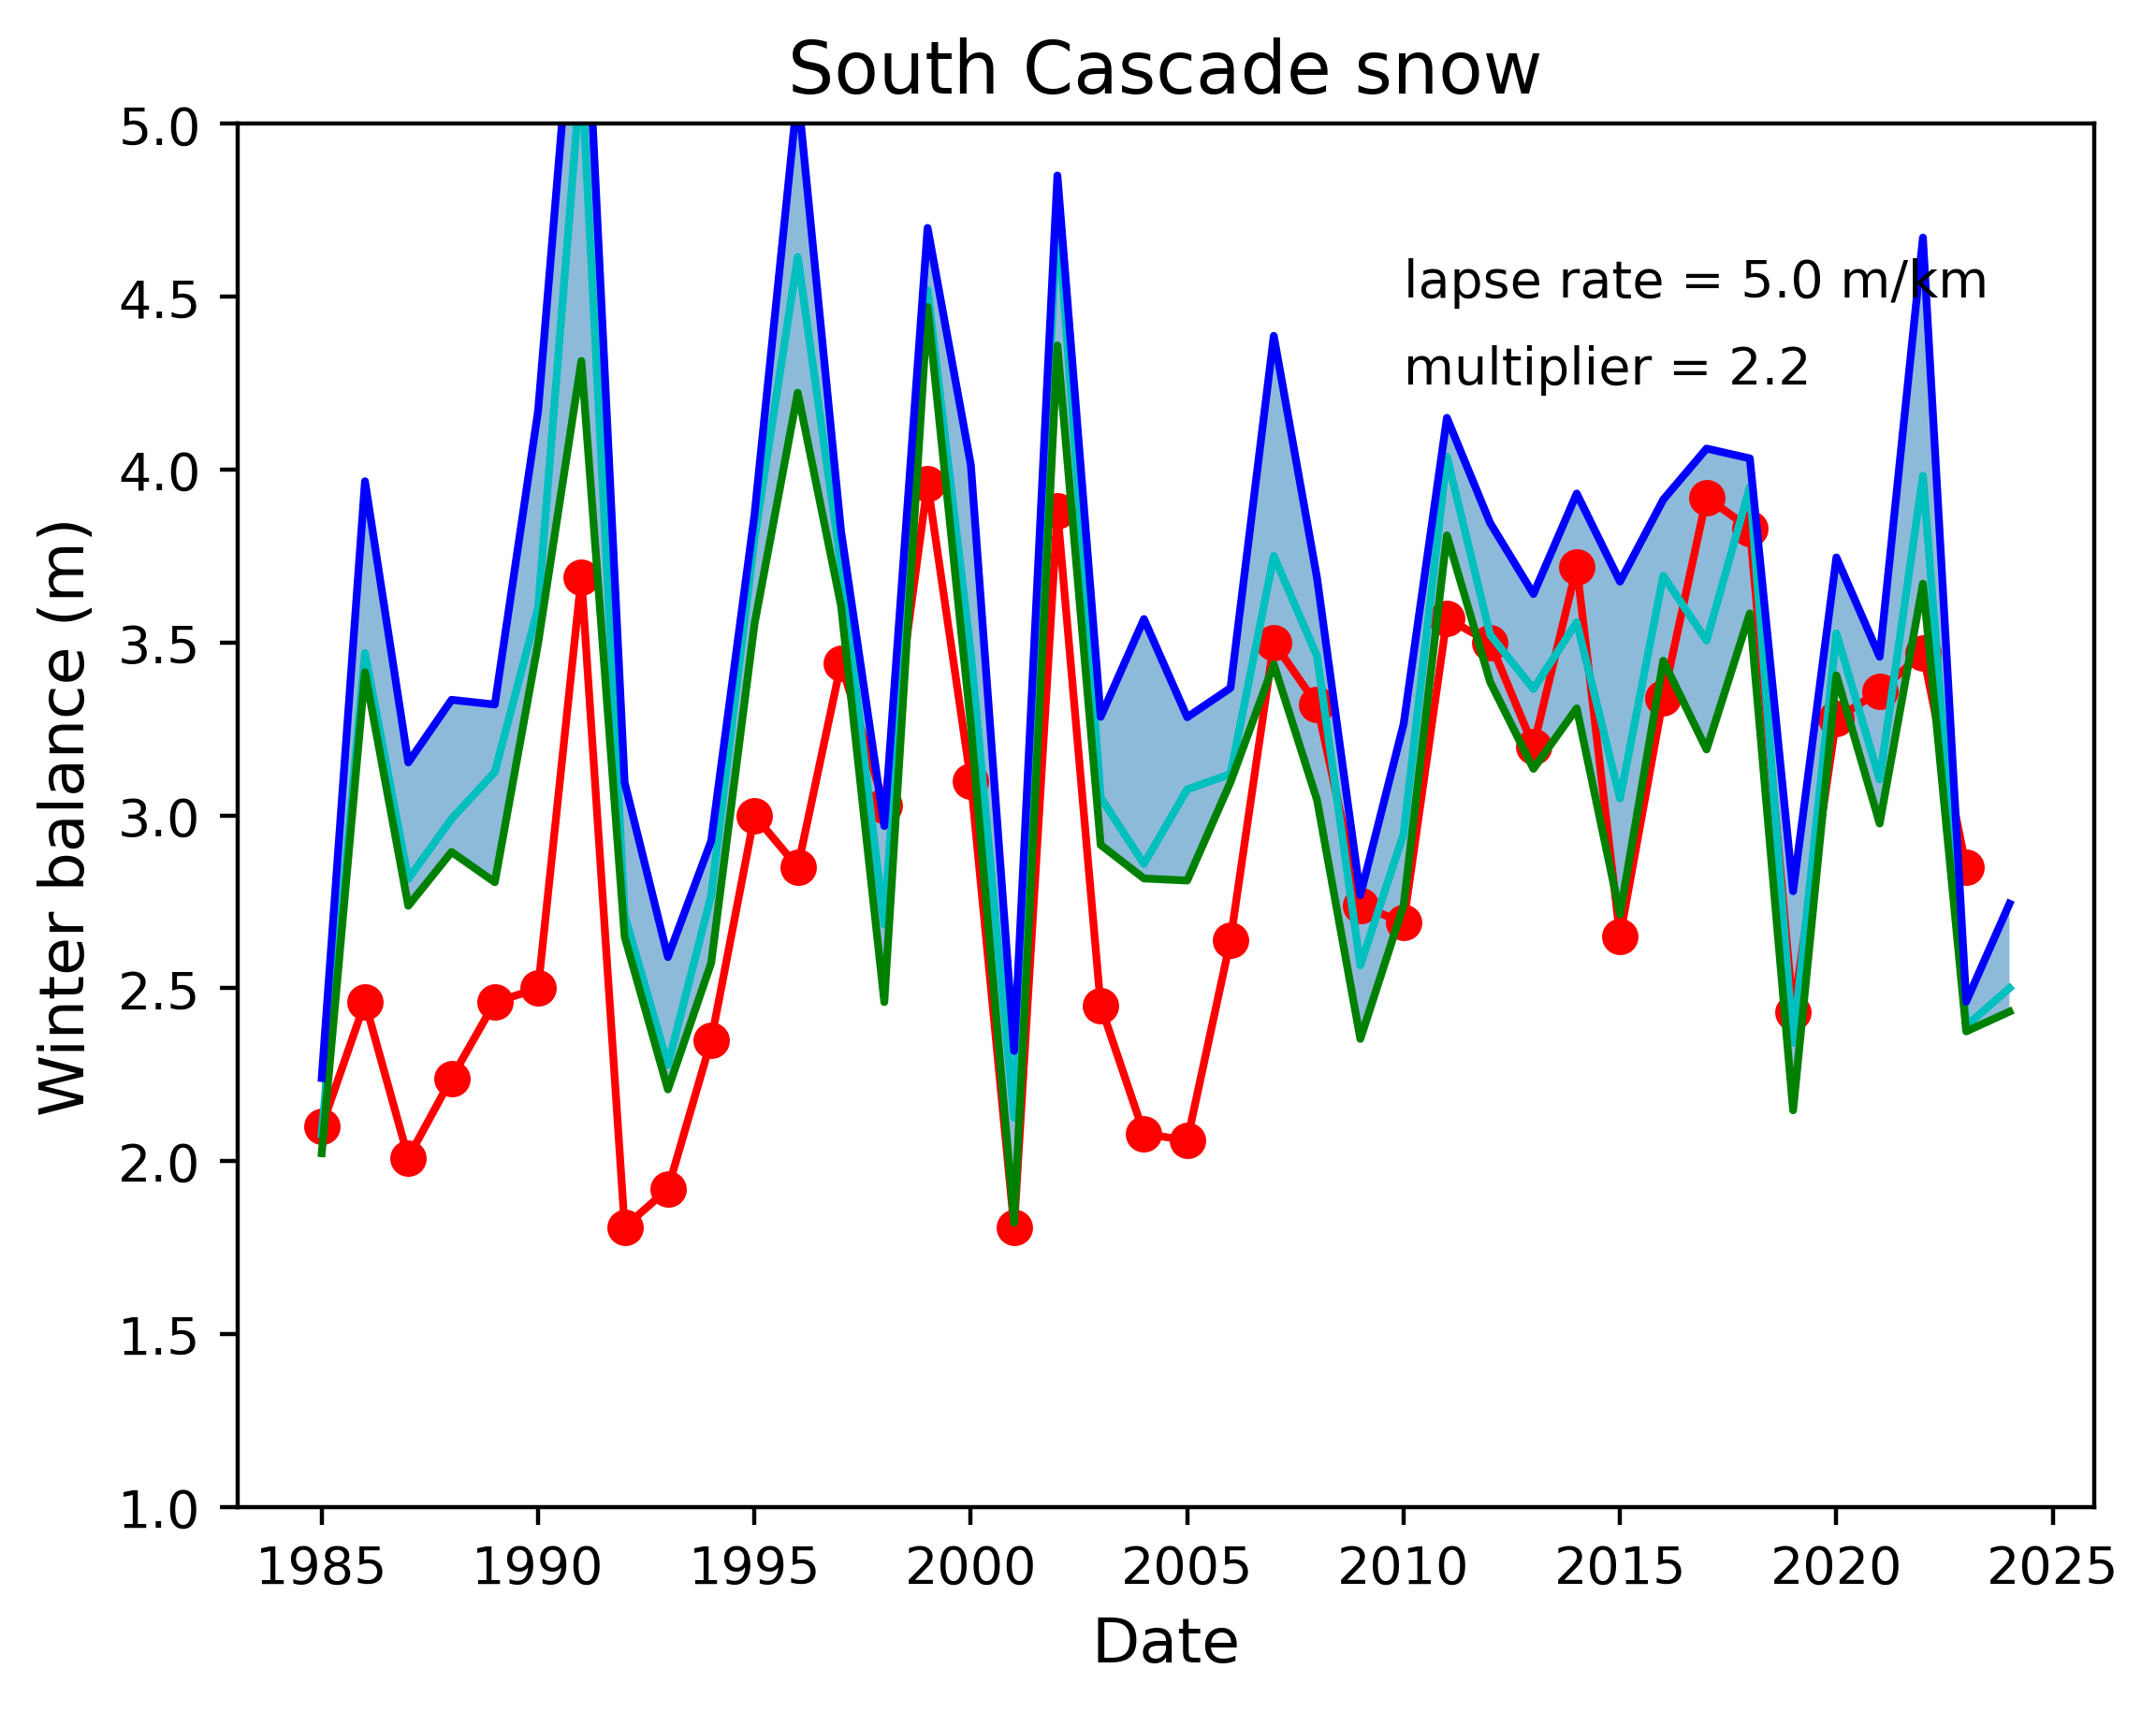

In [17]:
factor = 2.2
# looks like this factor might be growing with time, form 1.9 to 2.2...

pylab.plot(dates_num[2:]-1,winter_mb[1:],'r-o')
pylab.plot(dates_num[1:],snow_1900*factor,'c')
pylab.plot(dates_num[1:],snow_1700*factor,'g')
pylab.plot(dates_num[1:],snow_2200*factor,'b')

pylab.fill_between(dates_num[1:],snow_1700*factor,snow_2200*factor,alpha=0.5)
pylab.xlabel('Date',fontsize=12)
pylab.ylabel('Winter balance (m)',fontsize=12)
pylab.title("South Cascade snow",fontsize = 14)

ttext = 'multiplier = ' + str(factor) 
ttext2 = 'lapse rate = ' + str(lapse_rate*1000) + ' m/km'

pylab.ylim(1.0,5)
pylab.text(2010,4.25,ttext,fontsize=10) 
pylab.text(2010,4.5,ttext2,fontsize=10) 


pylab.show()

In [18]:


misfit = winter_mb[1:]-(snow_1900[:-1]*factor)
ss_residual = (sum(misfit**2))
r_squared = (sum(misfit**2))/len(snow_1900[:-1])
r_notsquared = numpy.sqrt(sum(misfit**2))/len(snow_1900[:-1])

ss_total = sum((winter_mb[1:] - numpy.mean(winter_mb[1:]))**2)
coeff = 1.0 - (ss_residual/ss_total) # this is called the coefficient of determination for which 1 is best fit

r_squared,r_notsquared, coeff



(0.41547053968204467, 0.1032138109027957, -0.011824742430960988)

In [19]:
numpy.mean(snow_1700)*factor,numpy.mean(snow_1900)*factor,numpy.mean(snow_2200)*factor

(3.091990000000046, 3.301485000000053, 3.621051500000068)

1.9000000000000004


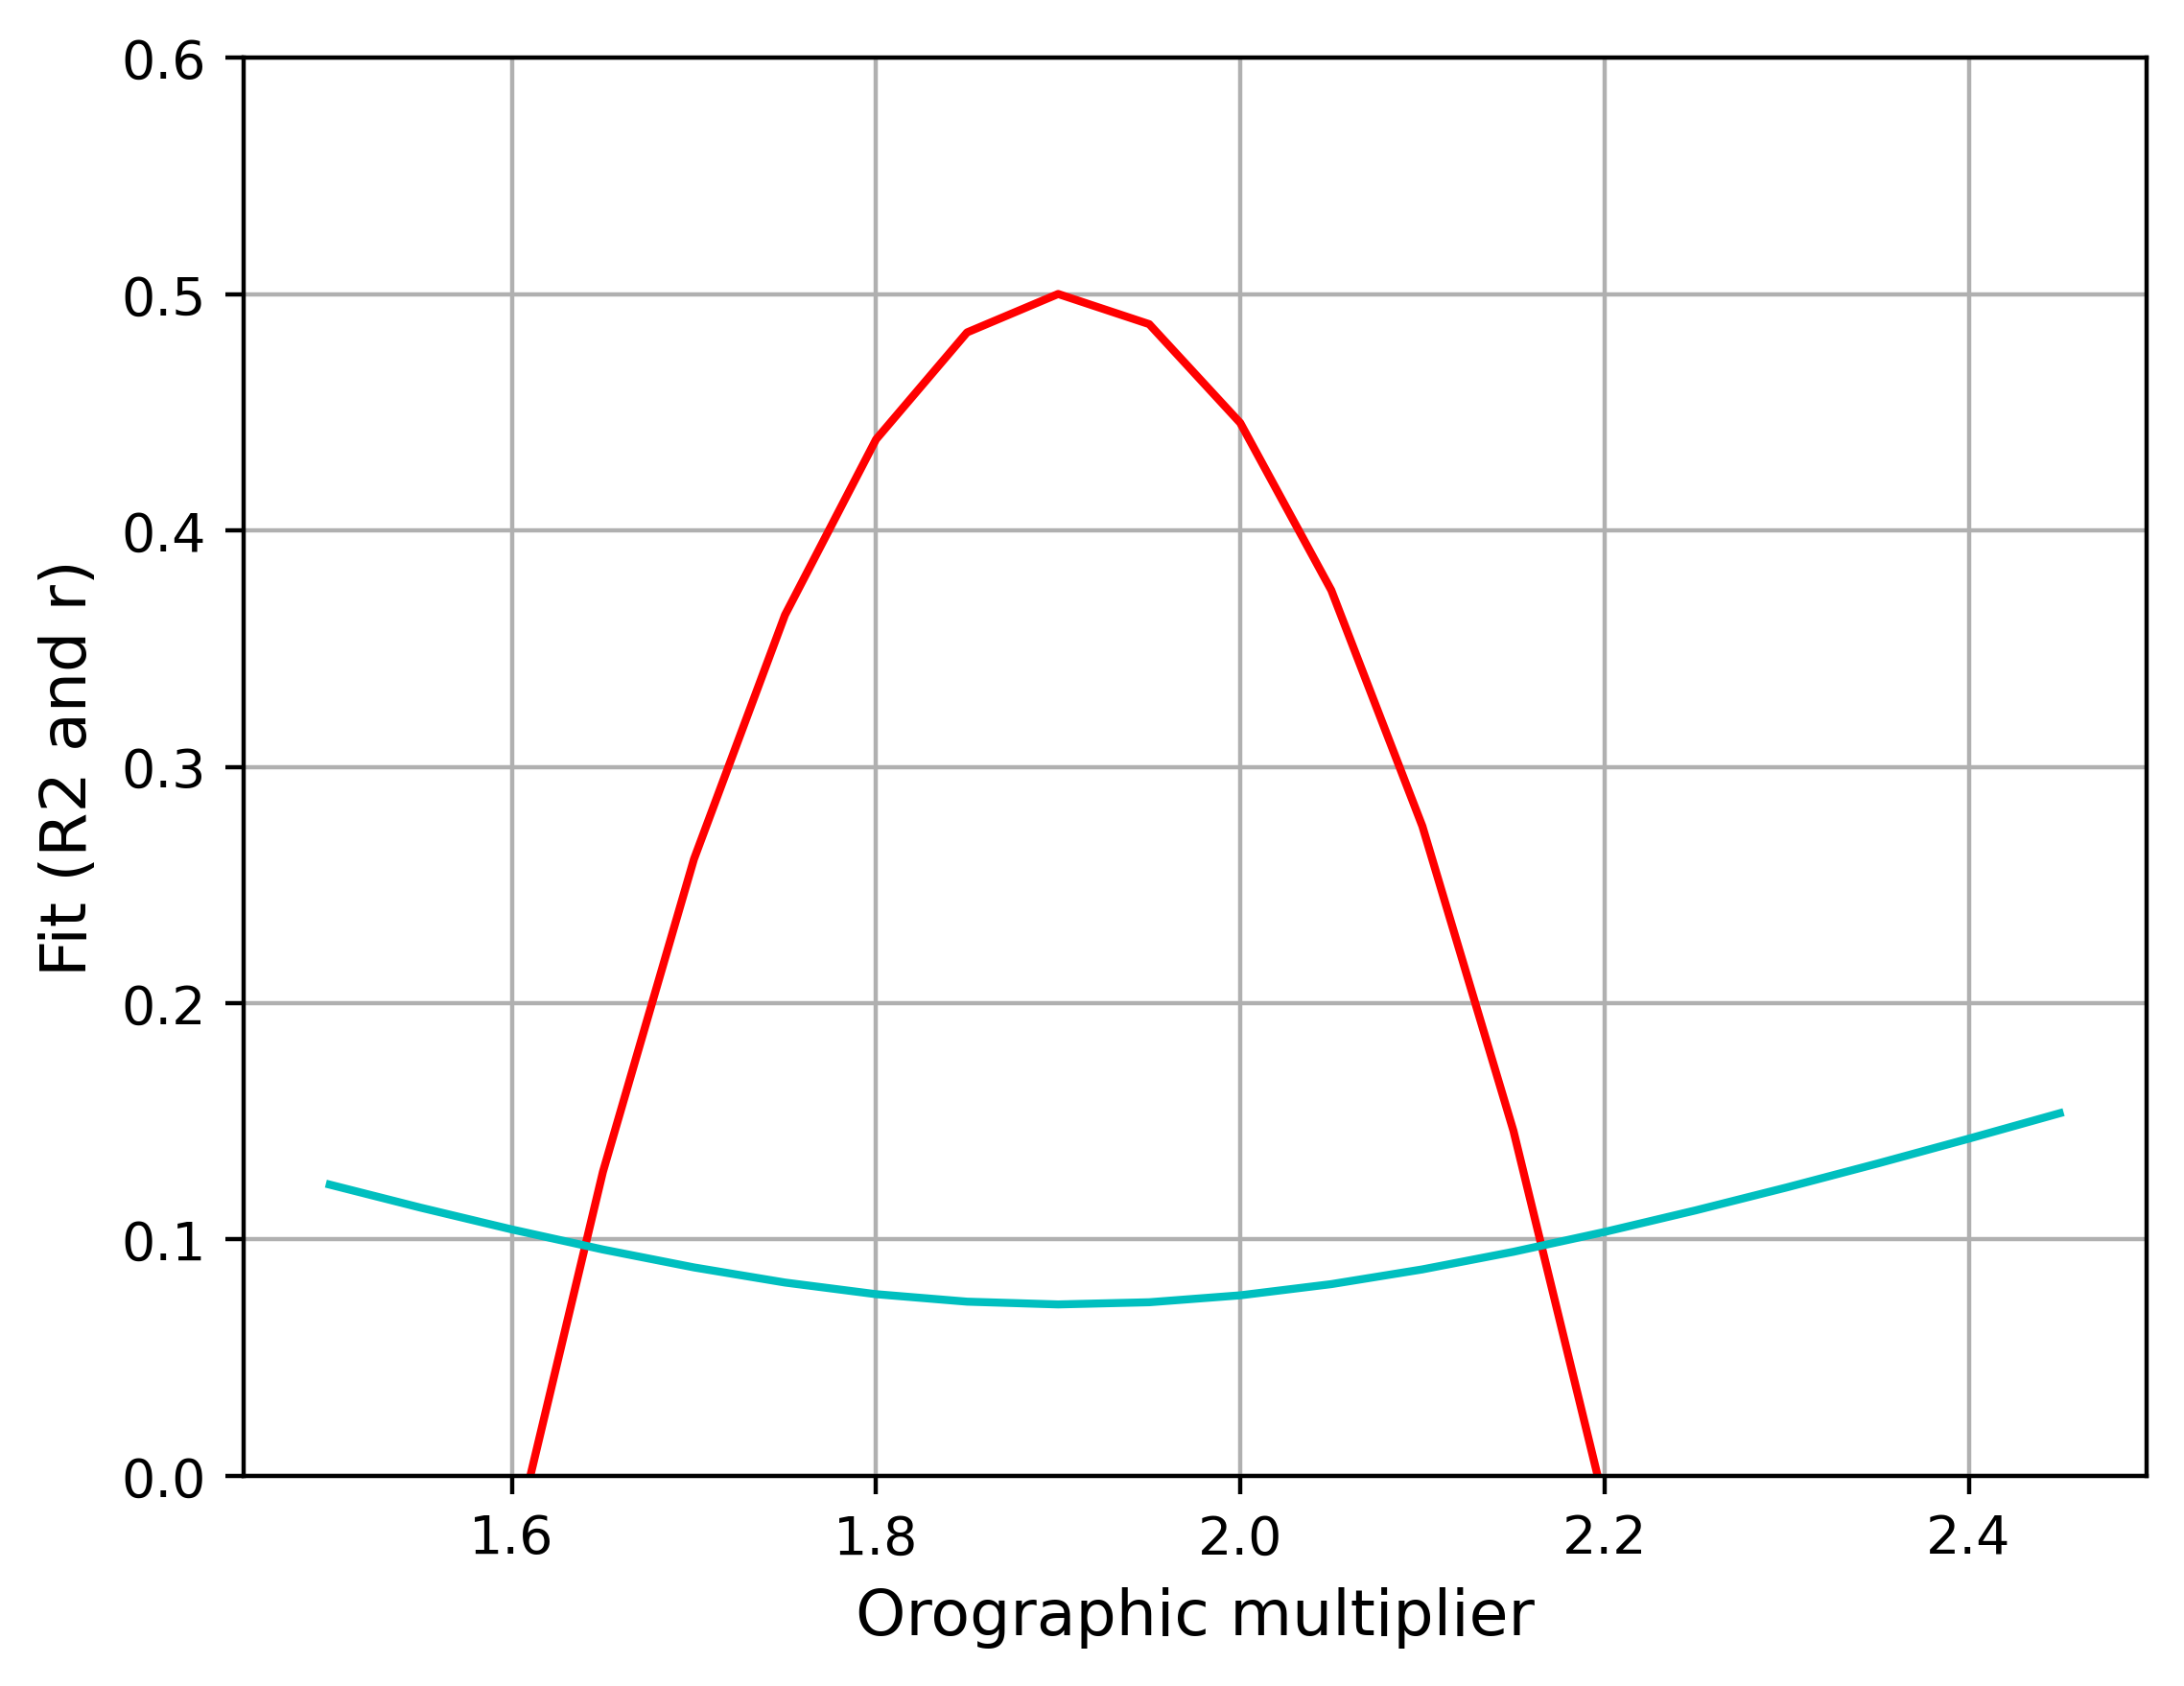

In [ ]:

factor_snow = numpy.arange(1.5,2.5,0.05)

r_notsquared_snow = numpy.zeros(len(factor_snow))
coeff_snow = numpy.zeros(len(factor_snow))


for i in range(len(factor_snow)):
    
    misfit = winter_mb[1:]-(snow_1900[:-1]*factor_snow[i])
    ss_residual = (sum(misfit**2))
    r_squared = (sum(misfit**2))/len(snow_1900[:-1])
    r_notsquared_snow[i] = numpy.sqrt(sum(misfit**2))/len(snow_1900[:-1])

    ss_total = sum((winter_mb[1:] - numpy.mean(winter_mb[1:]))**2)
    coeff_snow[i] = 1.0 - (ss_residual/ss_total) # this is called the coefficient of determination for which 1 is best fit

pylab.plot(factor_snow,coeff_snow,'r')
pylab.plot(factor_snow,r_notsquared_snow,'c')

pylab.xlabel('Orographic multiplier',fontsize=12)
pylab.ylabel('Fit (R2 and r)',fontsize=12)
#pylab.title("South Cascade snow",fontsize = 14)
pylab.ylim(0,0.6)
pylab.grid()

pylab.show()

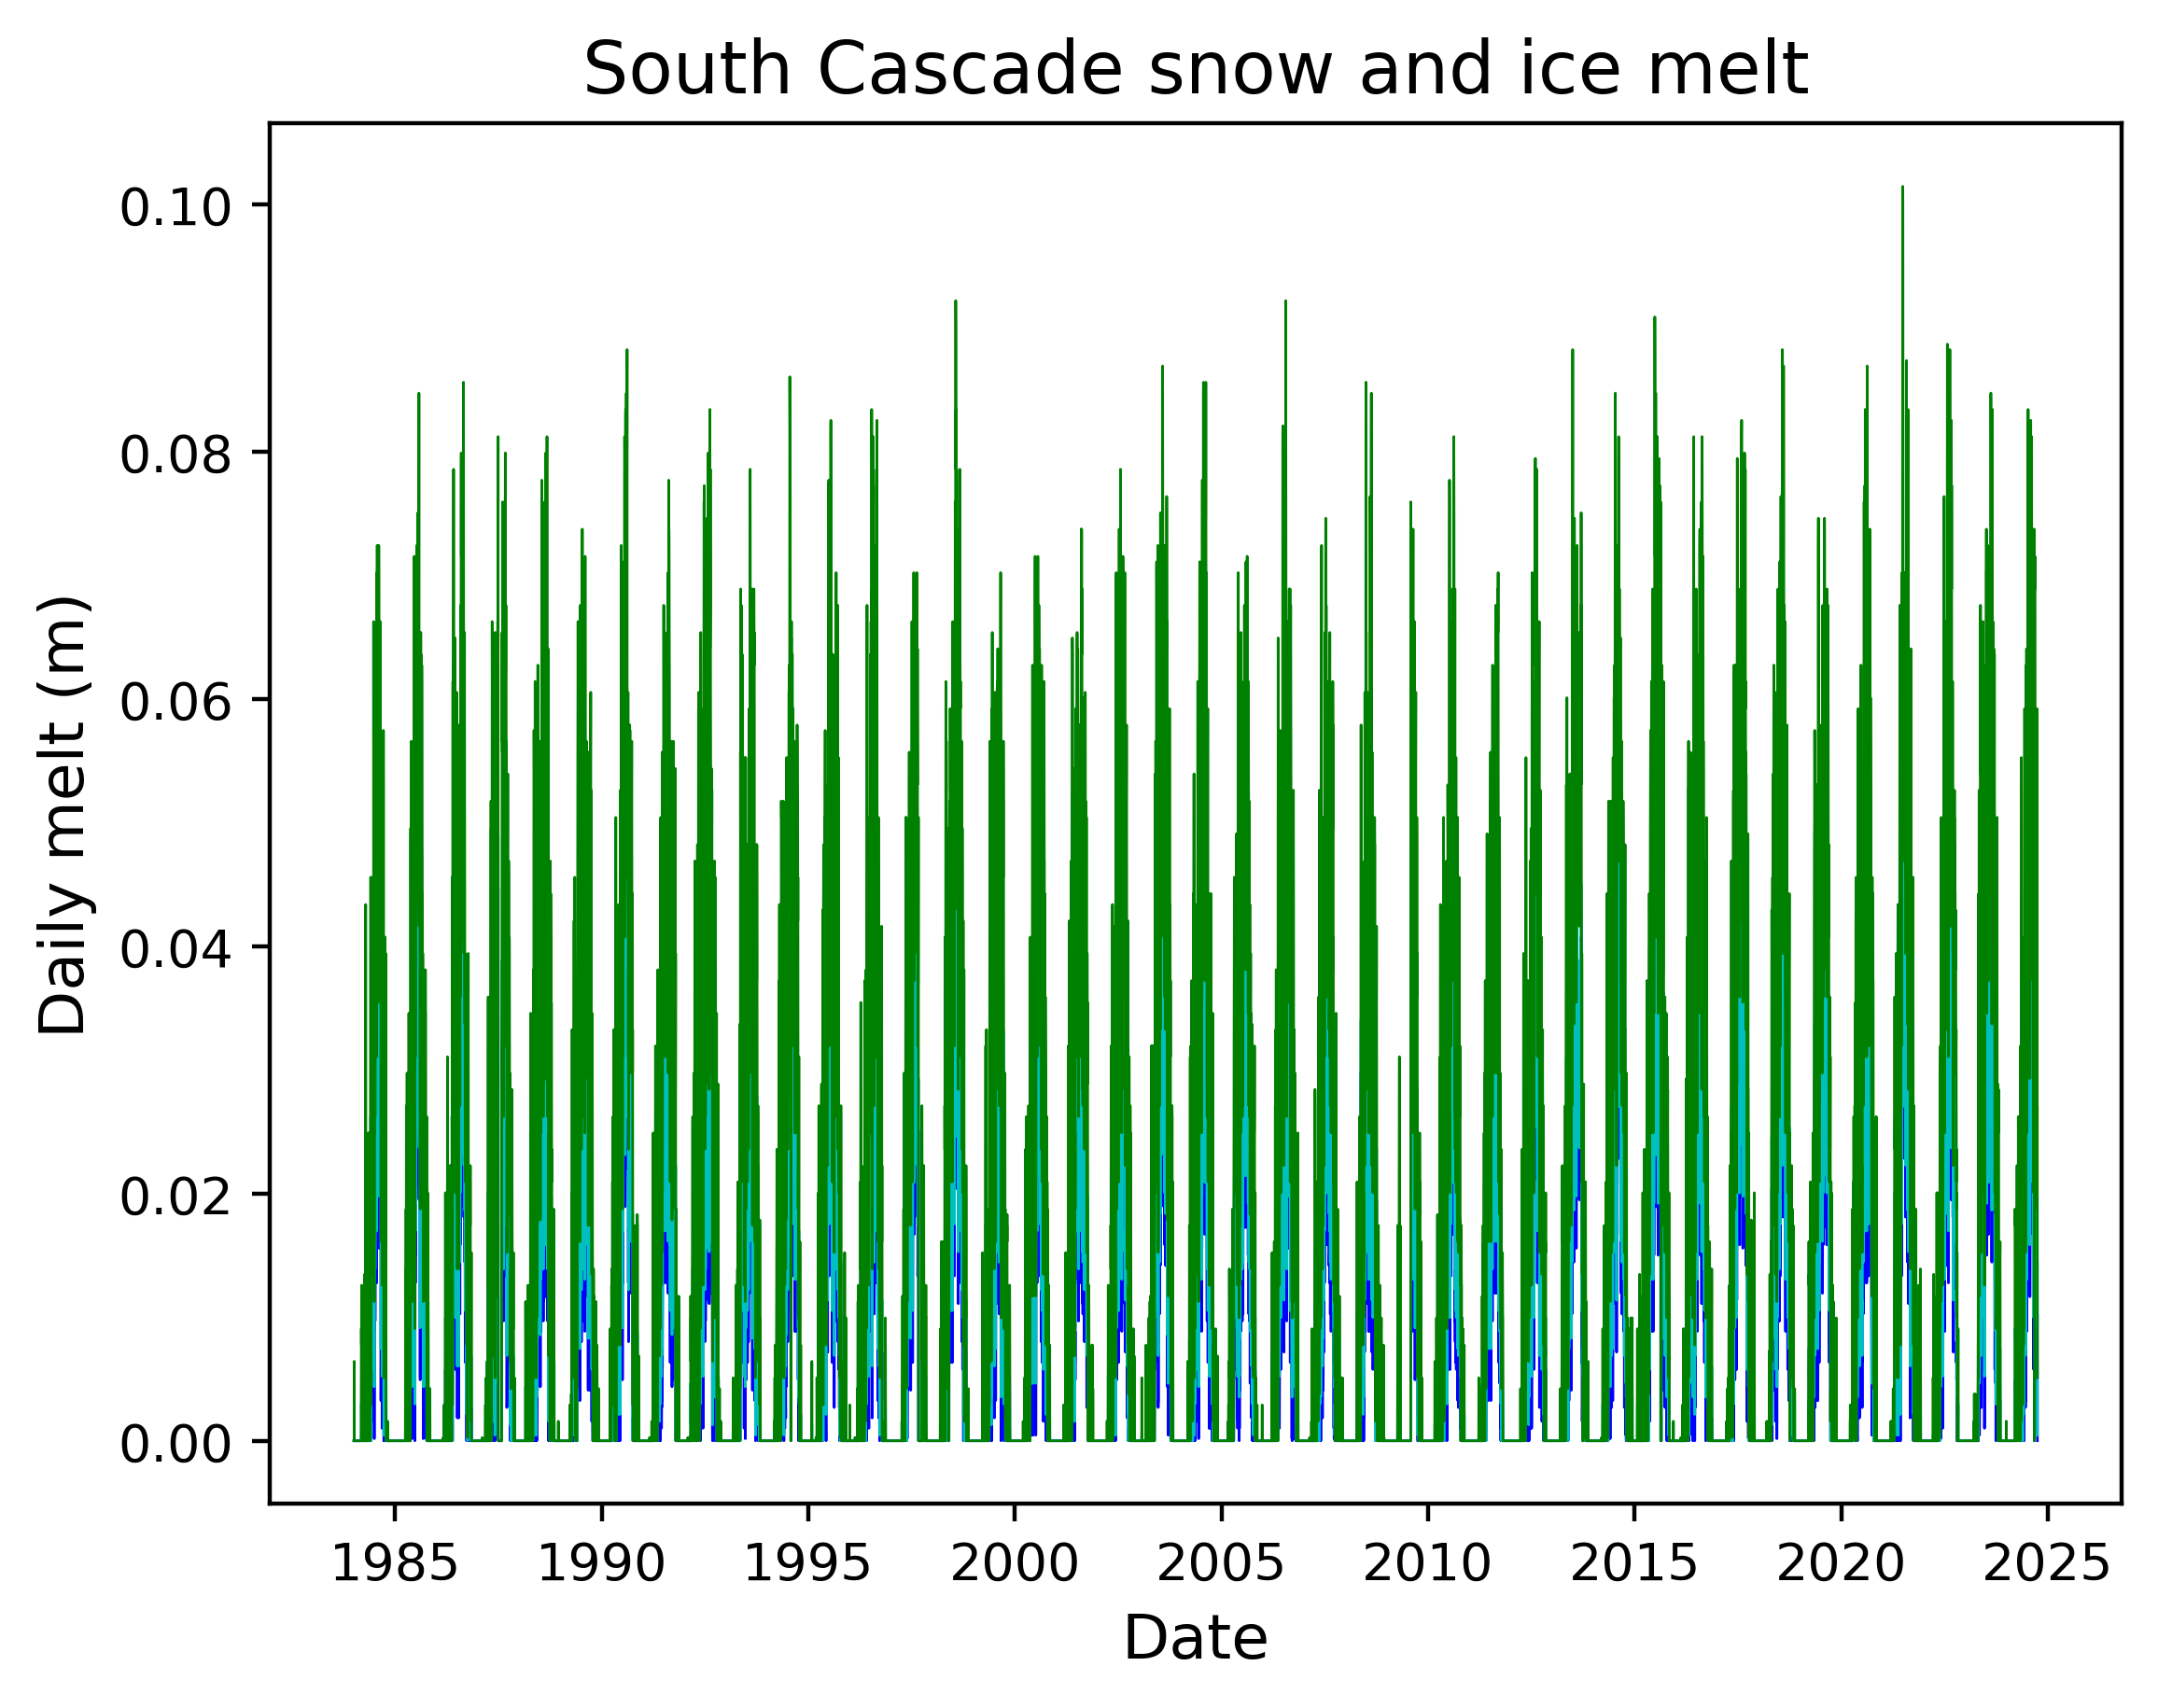

(2.389874353288987, 1.4098971981455346, -0.06006853456964381)

In [21]:
# now on to melt

melt1900 = numpy.zeros(len(temps))
melt1900[temps_lapse1900>0] = pdd_snow * temps_lapse1900[temps_lapse1900>0]
# assumes all melt is snow

melt1700 = numpy.zeros(len(temps))
melt1700[temps_lapse1700>0] = 0.5*(pdd_snow+pdd_ice) * temps_lapse1700[temps_lapse1700>0]
# assumes half is snow melt the other half ice melt

melt2200 = numpy.zeros(len(temps))
melt2200[temps_lapse2200>0] = pdd_snow * temps_lapse2200[temps_lapse2200>0]
# assumes all melt is snow at this top elevation

pylab.plot(dates[0:],melt2200[0:],'b',linewidth=0.5)
pylab.plot(dates[0:],melt1900[0:],'c',linewidth=0.5)
pylab.plot(dates[0:],melt1700[0:],'g',linewidth=0.5)

pylab.xlabel('Date',fontsize=12)
pylab.ylabel('Daily melt (m)',fontsize=12)
pylab.title("South Cascade snow and ice melt",fontsize = 14)
pylab.show()

temps_lapse1700[numpy.isnan(temps_lapse1700)] = 0
Tmean1700=numpy.mean(temps_lapse1700)

temps_lapse1900[numpy.isnan(temps_lapse1900)] = 0
Tmean1900=numpy.mean(temps_lapse1900)

temps_lapse2200[numpy.isnan(temps_lapse2200)] = 0
Tmean2200=numpy.mean(temps_lapse2200)

Tmean1700,Tmean1900,Tmean2200

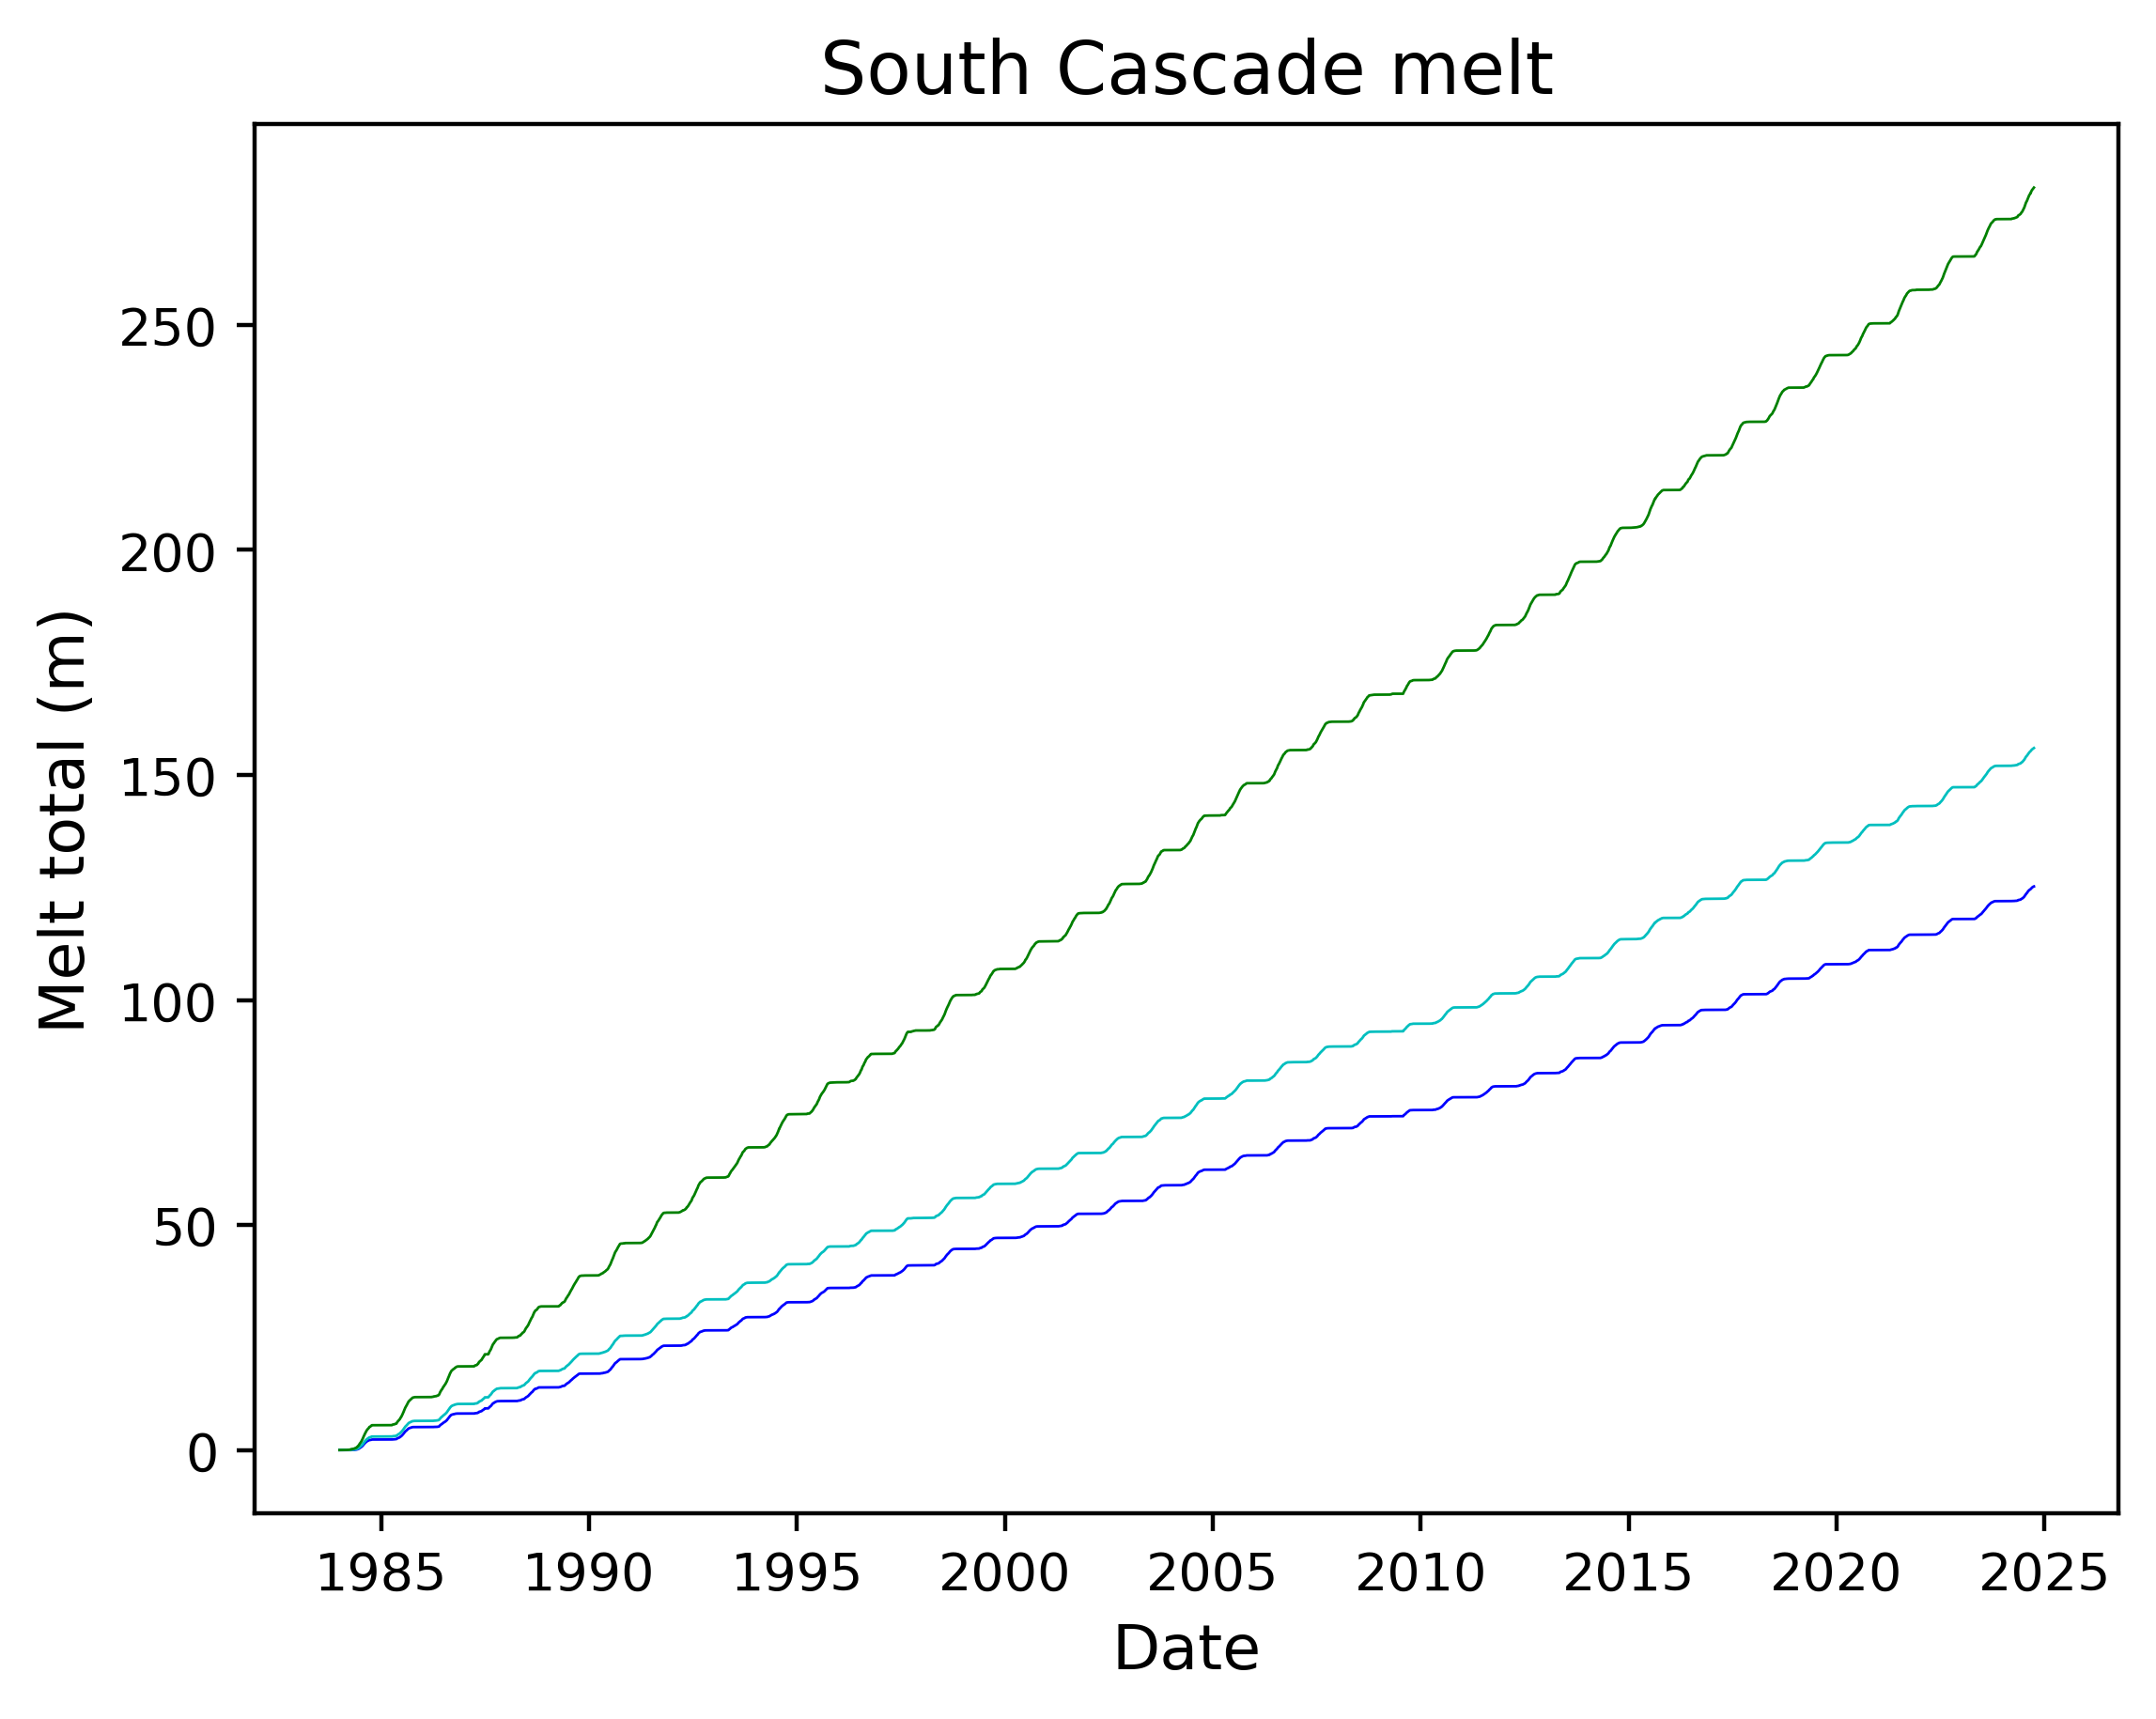

3.8996202000000117

In [22]:

melt_total_1900 = numpy.cumsum(melt1900)
melt_total_1700 = numpy.cumsum(melt1700)
melt_total_2200 = numpy.cumsum(melt2200)

pylab.plot(dates,melt_total_2200,'b',linewidth=0.5)
pylab.plot(dates,melt_total_1900,'c',linewidth=0.5)
pylab.plot(dates,melt_total_1700,'g',linewidth=0.5)

pylab.xlabel('Date',fontsize=12)
pylab.ylabel('Melt total (m)',fontsize=12)
pylab.title("South Cascade melt",fontsize = 14)
pylab.show()

melt_ave_annual = melt_total_1900[-1]/40
melt_ave_annual

In [23]:
# now on to melt

yr0 = 1980
imax = len(dates_num)

melt_total_1900_yr = numpy.zeros(imax)
melt_total_1700_yr = numpy.zeros(imax)
melt_total_2200_yr = numpy.zeros(imax)

melt_total_1900_yr[0] = 0.
melt_total_1700_yr[0] = 0.
melt_total_2200_yr[0] = 0.

meltyr_start = 165

melt_total_1900_yr[0] = melt_total_1900[meltyr_start]
melt_total_1700_yr[0] = melt_total_1700[meltyr_start]
melt_total_2200_yr[0] = melt_total_2200[meltyr_start]

    
for i in range(1,imax):
    
    melt_total_1900_yr[i] = melt_total_1900[wyr_start+(365*i)]
    melt_total_1700_yr[i] = melt_total_1700[wyr_start+(365*i)]
    melt_total_2200_yr[i] = melt_total_2200[wyr_start+(365*i)]
    
    

In [24]:
melt_1900=numpy.diff(melt_total_1900_yr)
melt_1700=numpy.diff(melt_total_1700_yr)
melt_2200=numpy.diff(melt_total_2200_yr)

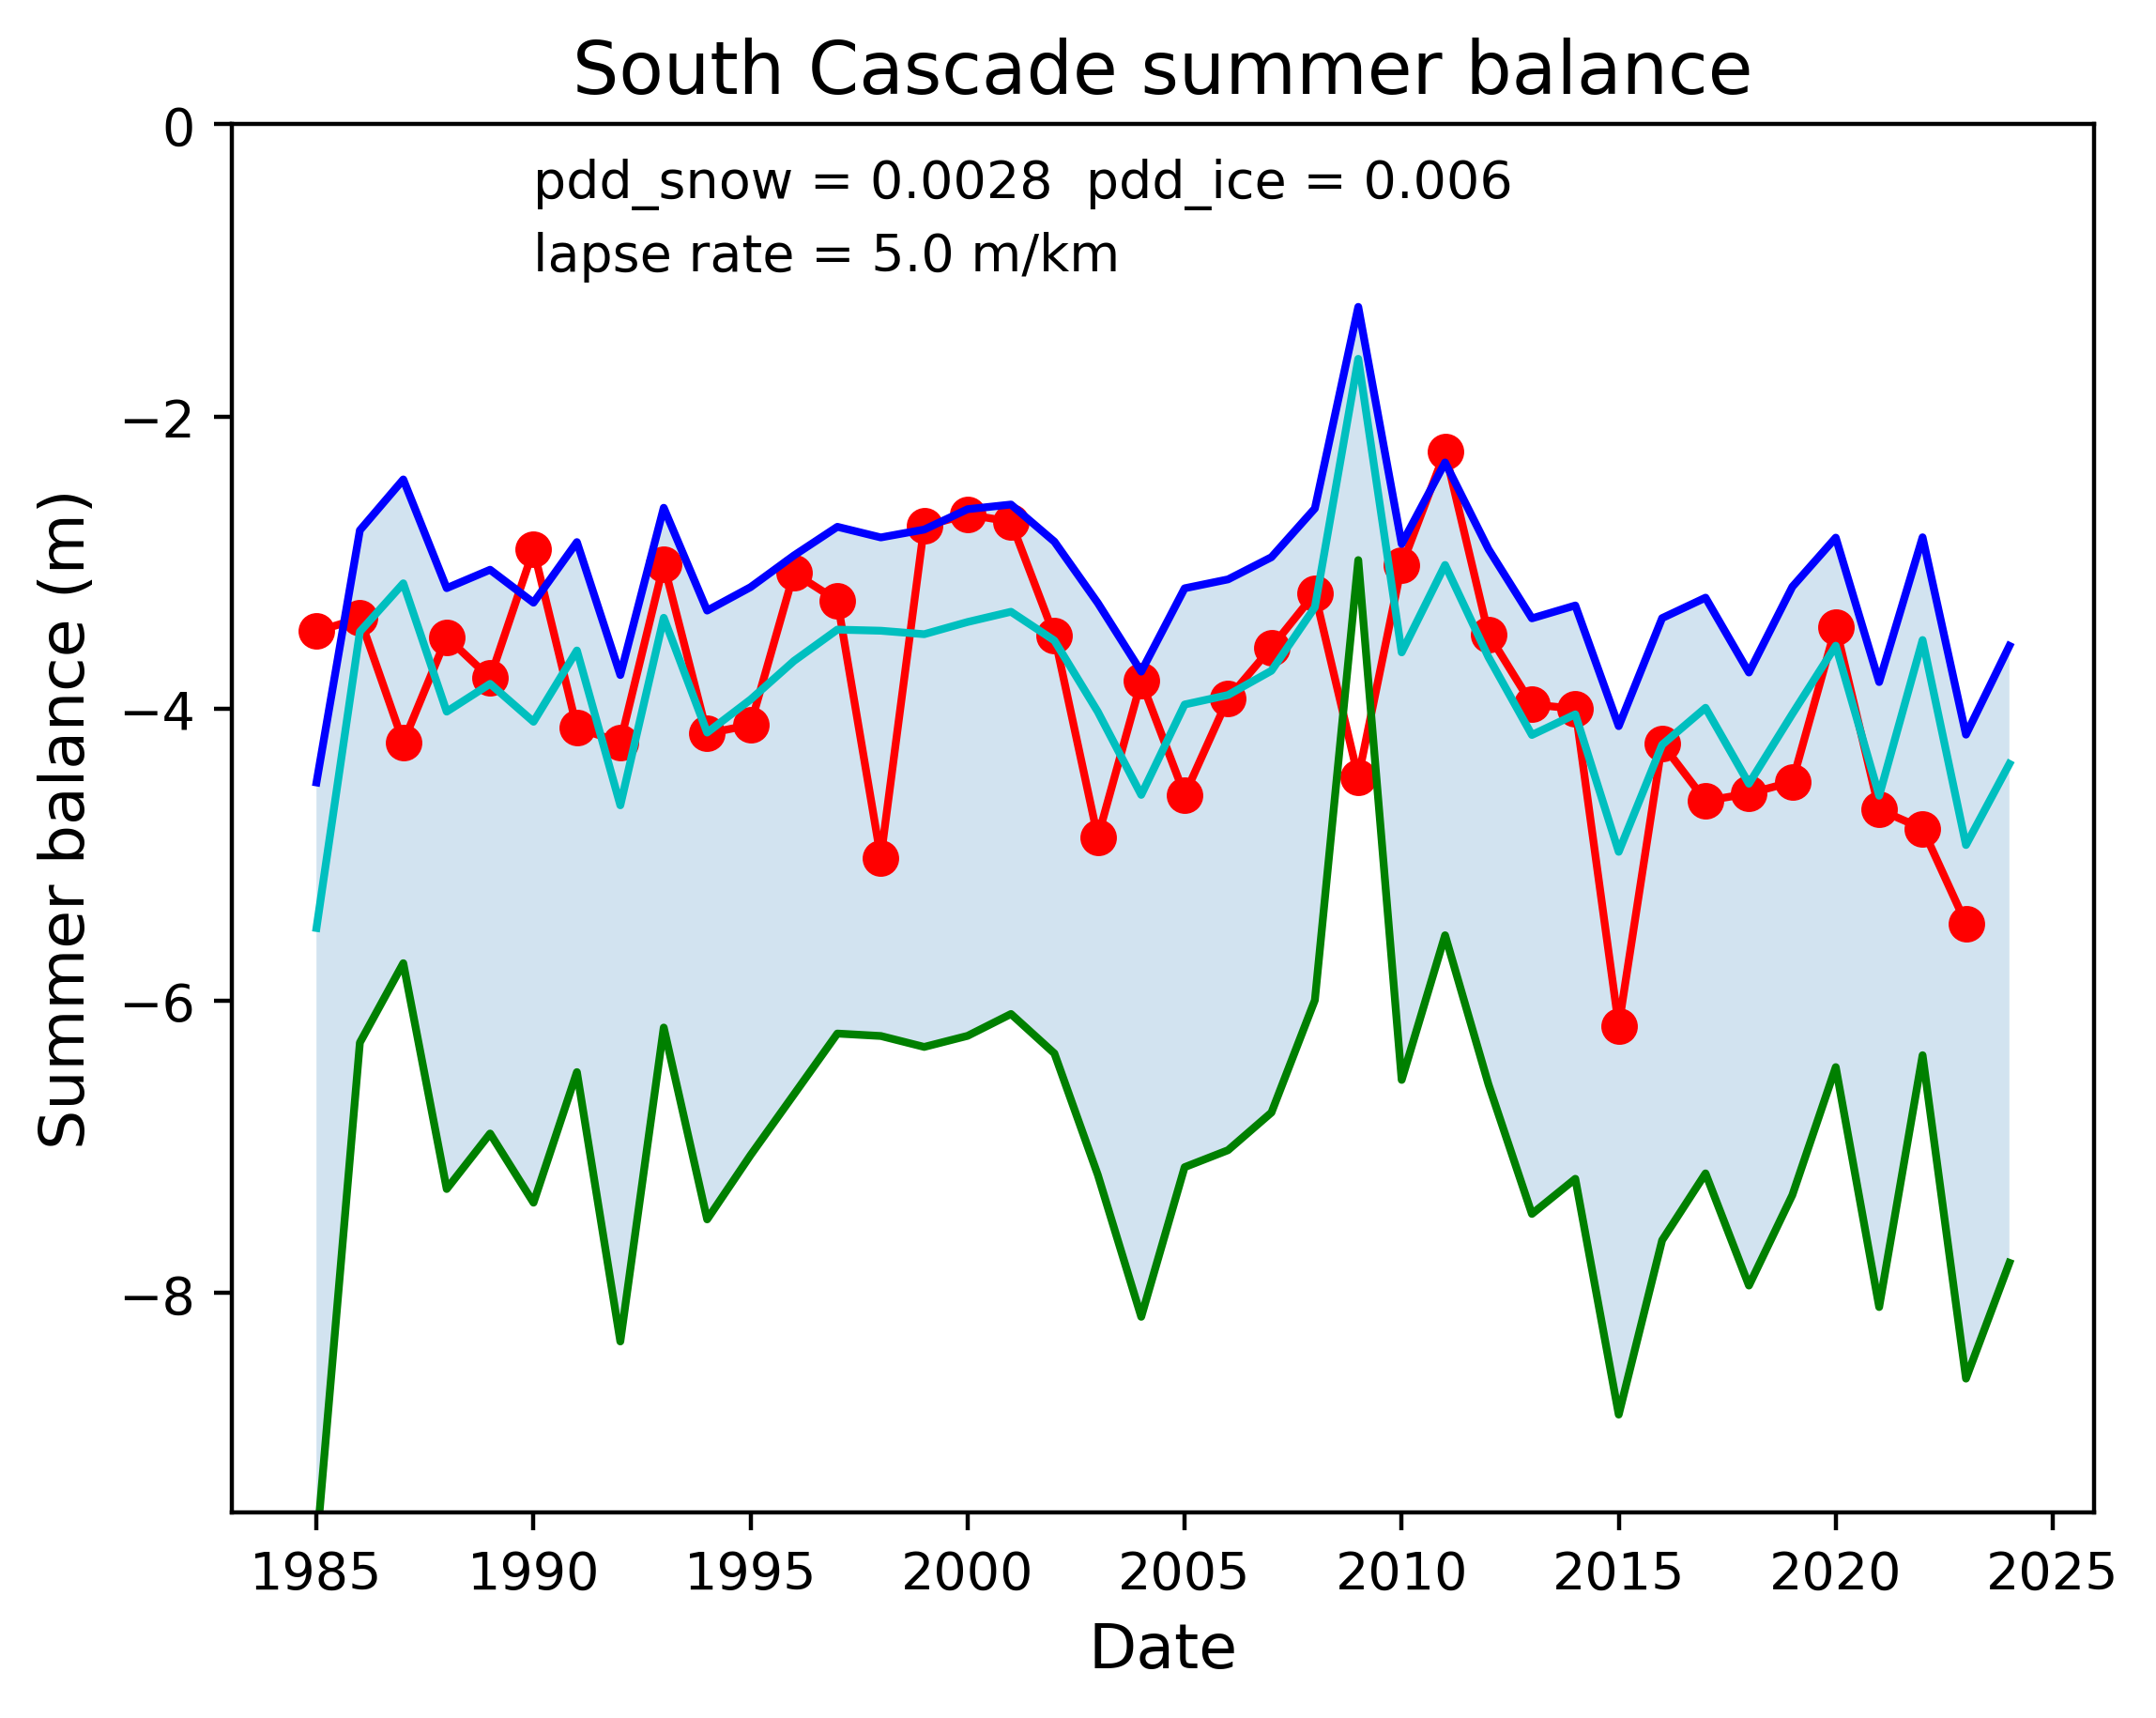

In [ ]:

pylab.plot(dates_num[2:]-1,summer_mb[1:],'r-o')
pylab.plot(dates_num[1:],-melt_1900,'c')
pylab.plot(dates_num[1:],-melt_1700,'g')
pylab.plot(dates_num[1:],-melt_2200,'b')


pylab.fill_between(dates_num[1:],-melt_1700,-melt_2200,alpha=0.2)
pylab.xlabel('Date',fontsize=12)
pylab.ylabel('Summer balance (m)',fontsize=12)
pylab.title("South Cascade summer balance",fontsize = 14)

ttext = 'pdd_snow = ' + str(pdd_snow)  + '  pdd_ice = ' + str(pdd_ice)
ttext2 = 'lapse rate = ' + str(lapse_rate*1000) + ' m/km'

pylab.text(1990,-0.5,ttext,fontsize=10) 
pylab.text(1990,-1.0,ttext2,fontsize=10) 

pylab.ylim(-9.5,0)
pylab.show()

In [26]:
misfit = summer_mb[1:]-(-melt_1900[:-1])
r_squared = (sum(misfit**2))/len(melt_1900[:-1])
ss_residual = (sum(misfit**2))
r_notsquared = numpy.sqrt(sum(misfit**2))/len(melt_1900[:-1])
r_squared,r_notsquared

ss_total = sum((summer_mb - numpy.mean(summer_mb))**2)
coeff_melt = 1.0 - (ss_residual/ss_total) # this is called the coefficient of determination

r_squared,r_notsquared,coeff_melt

(0.6899608803626589, 0.13300866372038914, 0.060992637512096715)

In [27]:
numpy.mean(melt_1700),numpy.mean(melt_1900),numpy.mean(melt_2200)

(6.945215199999962, 3.8637914000000118, 3.103723000000008)

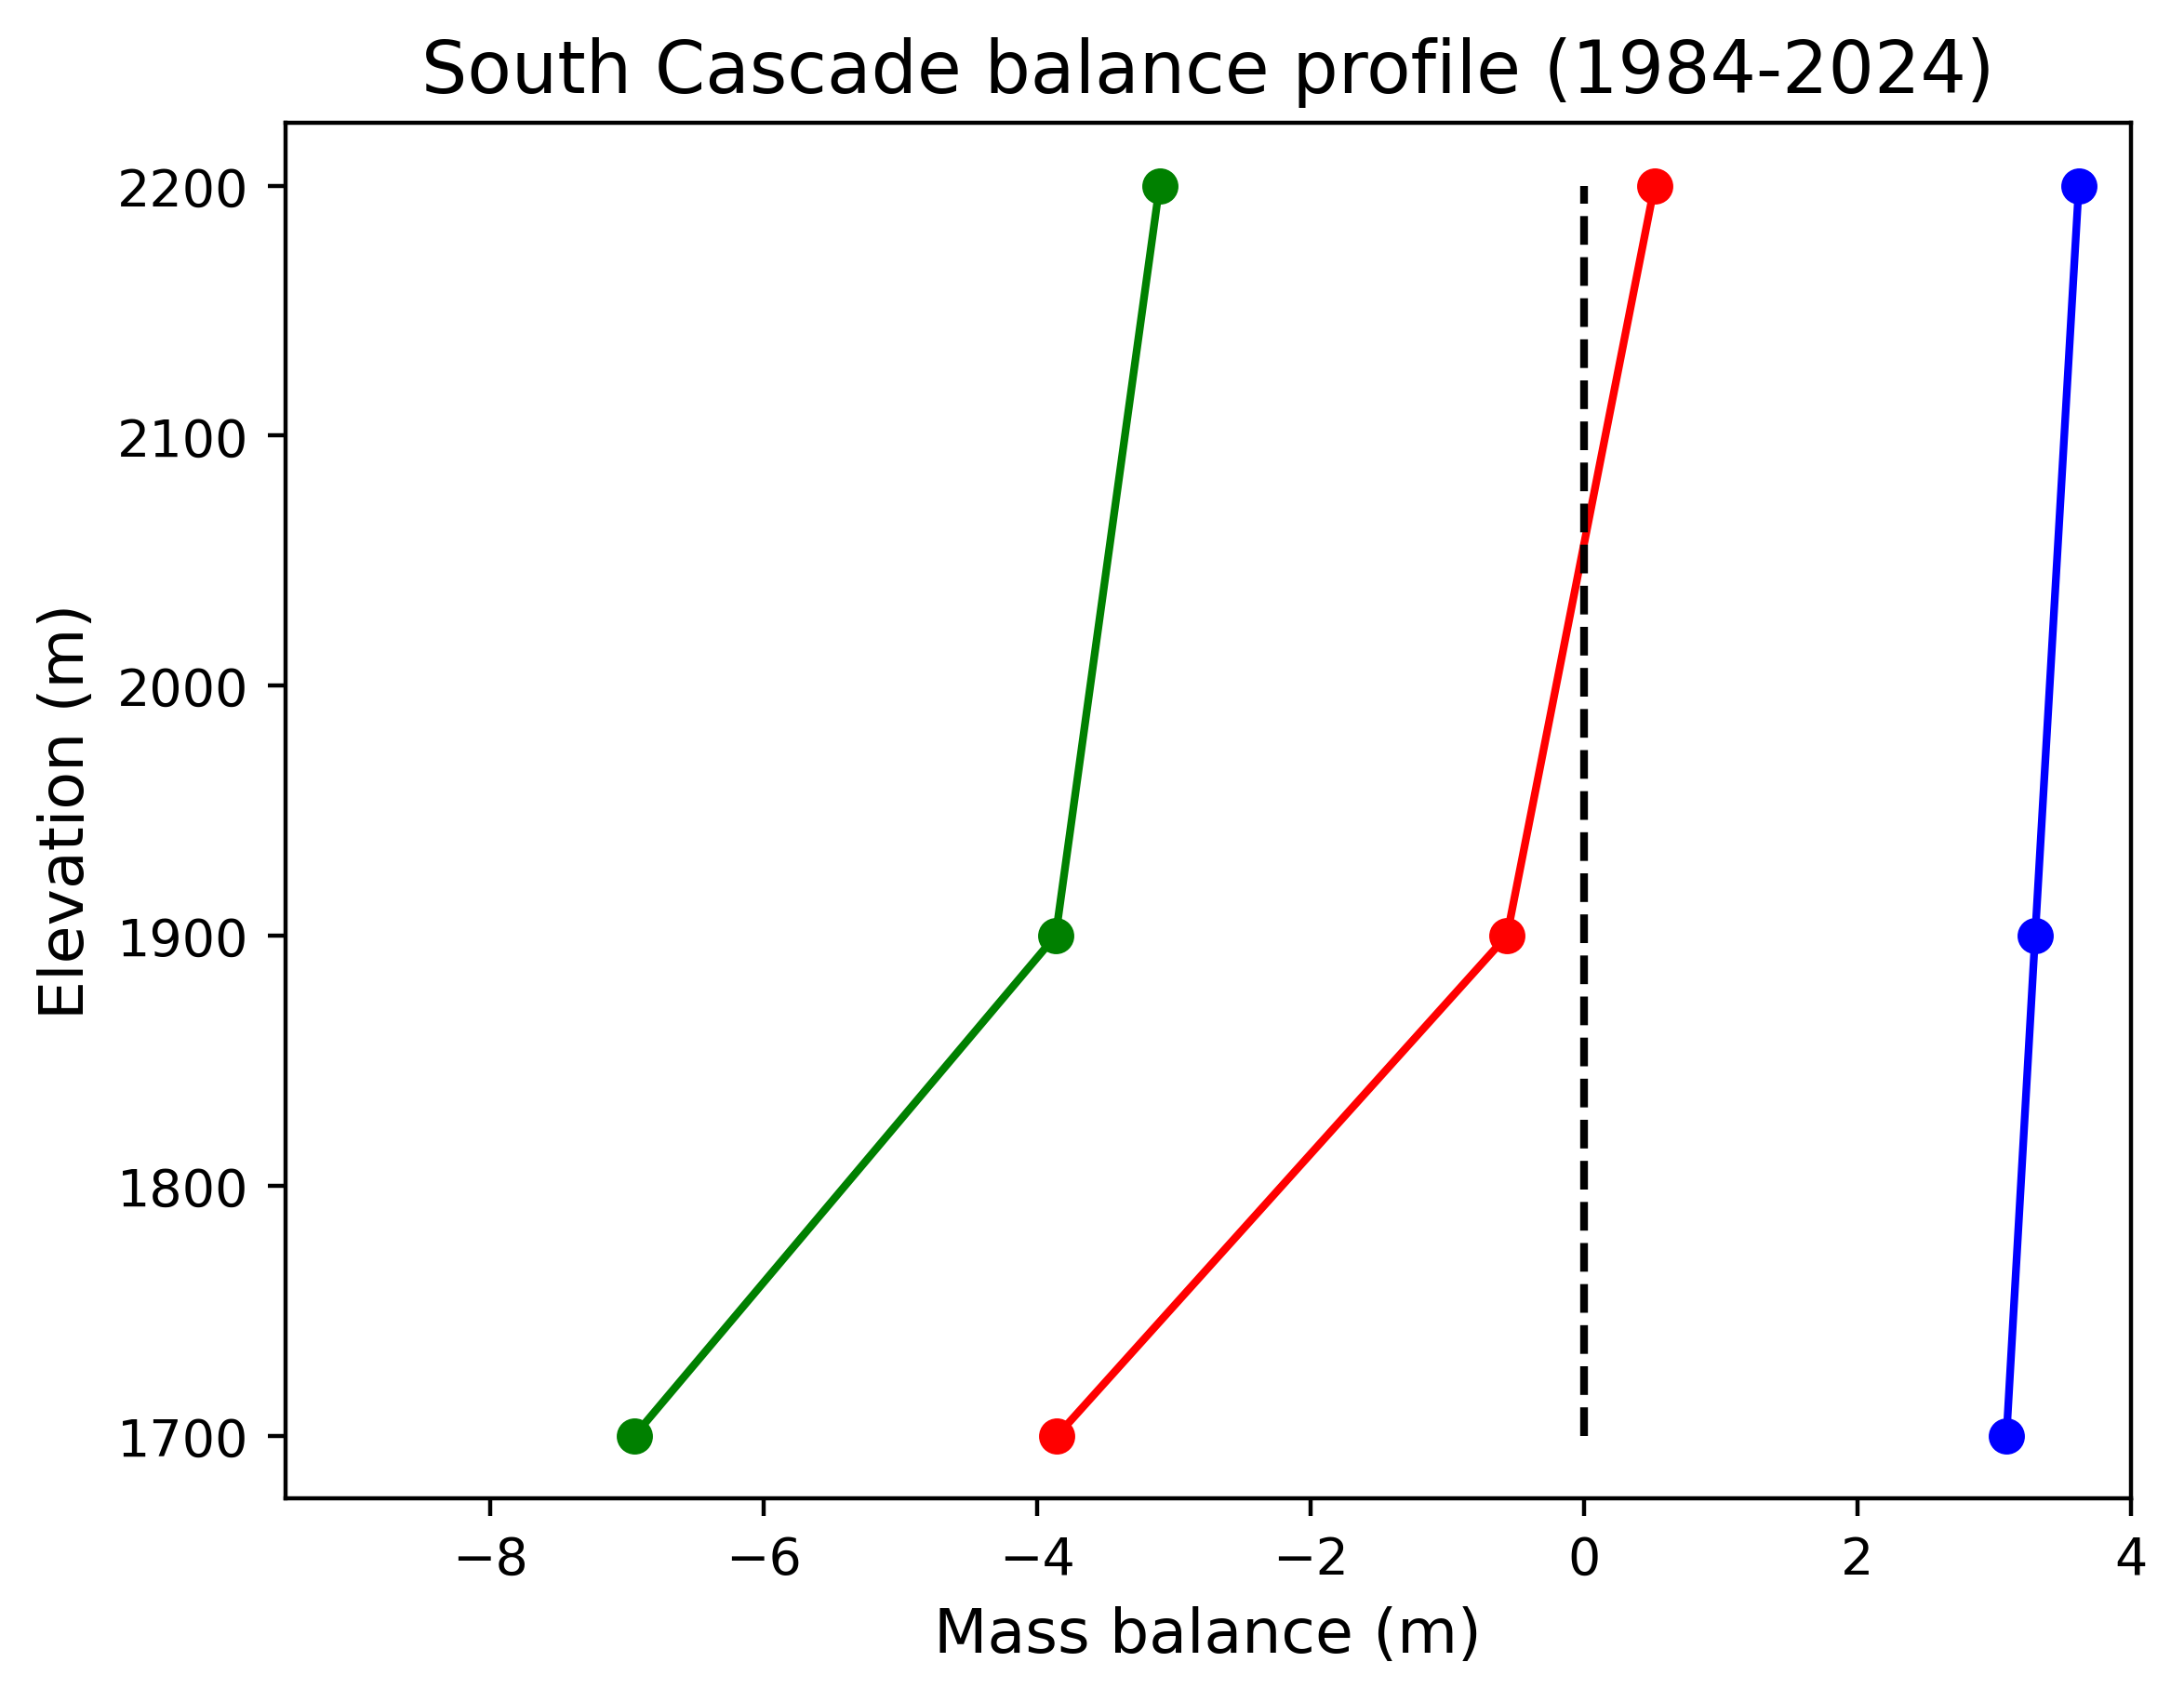

In [28]:


elev = ([1700,1900,2200])
melt = ([numpy.mean(melt_1700),numpy.mean(melt_1900),numpy.mean(melt_2200)])
snow = ([numpy.mean(snow_1700)*factor,numpy.mean(snow_1900)*factor,numpy.mean(snow_2200)*factor])

melt_arr = numpy.array(melt)
snow_arr = numpy.array(snow)

bzero = numpy.zeros(len(melt_arr))

pylab.plot(-melt_arr,elev,'go-')
pylab.plot(snow_arr,elev,'bo-')
pylab.plot(snow_arr - melt_arr,elev,'ro-')
pylab.plot(bzero,elev,'k--')

pylab.xlabel('Mass balance (m)',fontsize=12)
pylab.ylabel('Elevation (m)',fontsize=12)
pylab.title("South Cascade balance profile (1984-2024)",fontsize = 14)


pylab.xlim(-9.5,4)
             
pylab.show()



In [29]:
# playing with pandas

df_test = pd.read_csv('Input_SouthCascade_Daily_Weather.csv')
#dates_list = pd.to_datetime(df_test.iloc[:, 0], format="%Y/%m/%d").tolist()
dates_test = pd.to_datetime(df_test.iloc[:, 0], format="%Y/%m/%d").to_numpy()


FileNotFoundError: [Errno 2] No such file or directory: 'Input_SouthCascade_Daily_Weather.csv'

In [ ]:
dates_test_series = pd.Series(dates_test)
dates_test_yr = dates_test_series.dt.year
dates_test_mo = dates_test_series.dt.month

dates_test_day = dates_test_series.dt.day_of_year

dates_test_day[0:400]

type(dates_test_yr)

pandas.core.series.Series

In [ ]:
# now deal with leap years

len_yr = 365*numpy.ones(len(dates_yr_np))
len_yr[dates_yr_np%4 == 0] = 366

In [ ]:
date_yrfrac = dates_test_yr + (dates_test_day/len_yr)

In [ ]:
date_yrfrac[0:369]

0      1984.005464
1      1984.008197
2      1984.010929
3      1984.013661
4      1984.016393
          ...     
364    1985.000000
365    1985.002740
366    1985.005479
367    1985.008219
368    1985.010959
Length: 369, dtype: float64

In [ ]:
type(date_yrfrac)

pandas.core.series.Series

In [ ]:
yr_np = date_yrfrac.to_numpy()

In [ ]:
yr_np[0:20]

array([1984.00546448, 1984.00819672, 1984.01092896, 1984.0136612 ,
       1984.01639344, 1984.01912568, 1984.02185792, 1984.02459016,
       1984.0273224 , 1984.03005464, 1984.03278689, 1984.03551913,
       1984.03825137, 1984.04098361, 1984.04371585, 1984.04644809,
       1984.04918033, 1984.05191257, 1984.05464481, 1984.05737705])

## Notes

#### The met measurements used in Rasmussen suggest that the lapse rate changes over the season. That is not incorporated yet.  
#### This code does not employ the hypsometry of the glacier, so I have merely attempted to fit the glacier-wide mass balance measurements at the rough ELA of 1900 m.  One could do an area-weighted averaging fo the melt and the snowfall to generate better targets.
#### It appears that the orographic enhancement from 272 m met station to the glaceir is changing through time (the "factor" used in the snow calculations).   I use the factor that best fits the mean, but one could allow that to rise through time from 1.9 to 2.2.
#### I have used a 0°C cutoff for snowfall as well - one could use 1 or 2°C to get more snowfall...but I need a justification for that. 

In [ ]:
type(snow)

list